In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # some imports to set up plotting
import matplotlib
import seaborn as sns # pip install seaborn

import warnings
warnings.filterwarnings('ignore')

# Graphics in retina format are more sharp and legible
%config InlineBackend.figure_format = 'retina'

##Matlpotlib, Seaborn

Берем данные отсюда: [гитхаб](https://github.com/Laggg/data--for--students)

In [ ]:
pd.read_csv('beauty.csv', nrows=2)

,wage;exper;union;goodhlth;black;female;married;service;educ;looks
0,5.73;30;0;1;0;1;1;1;14;4
1,4.28;28;0;1;0;1;1;0;12;3


Замечаем, что в данном случае - разделитель колонок - символ ";"

In [ ]:
df = pd.read_csv('beauty.csv', sep=';')
df.head()

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3


Прежде чем строить графики, посмотрим на то, а что вообще можно настраивать с помощью Matplotlib в самих графиках.

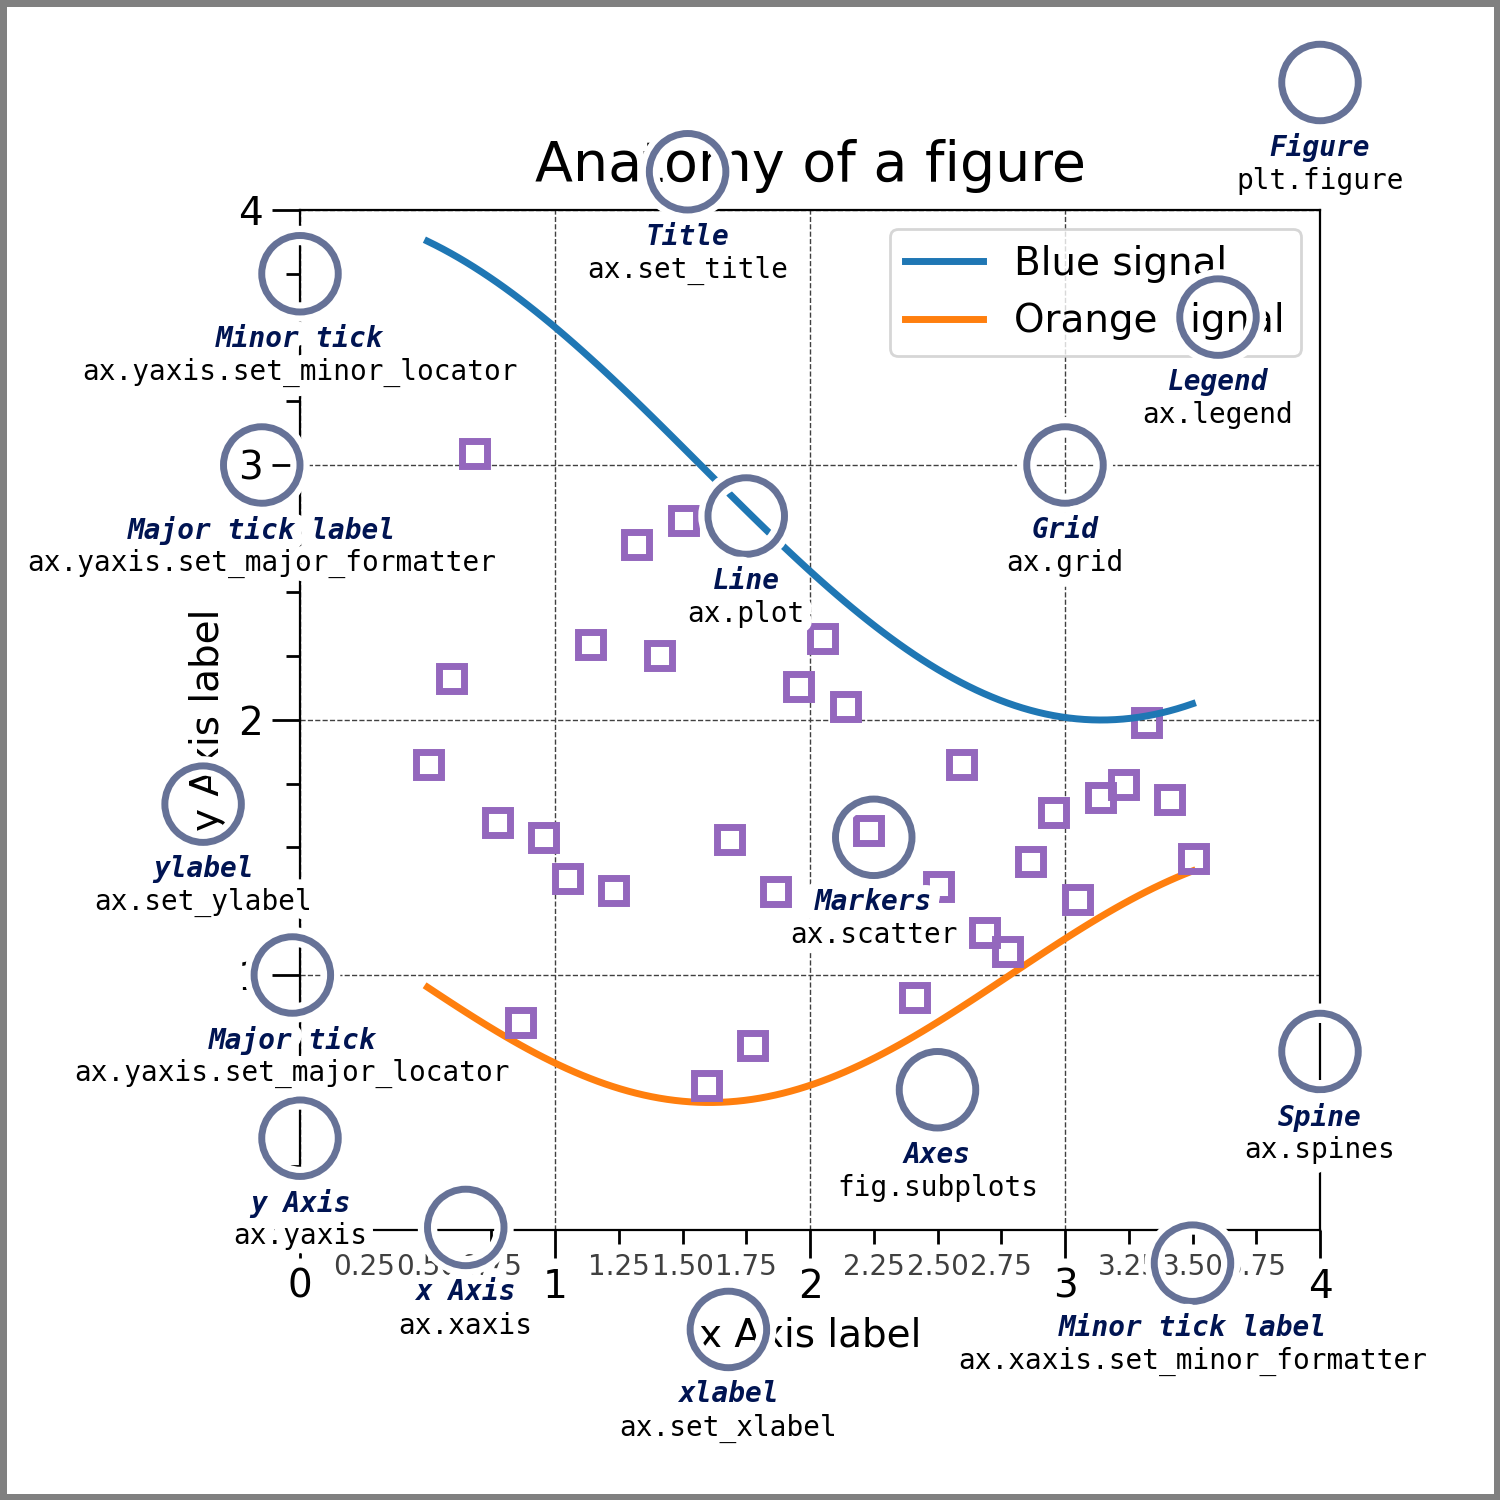

## Строим некоторые виды графиков

Обычный график, построенный по точкам. На вход может подаваться как лист, так и массив, серия значений. Возможно использовать следующие параметры:

* linewidth ширина линии, соединяющей соседние точки
* color цвет линии
* marker вид точкек, которые соединяются линиями
* linestyle стиль линии (сплошная, прерывистая, точка-тире и т.д.)
* label подпись на легенде

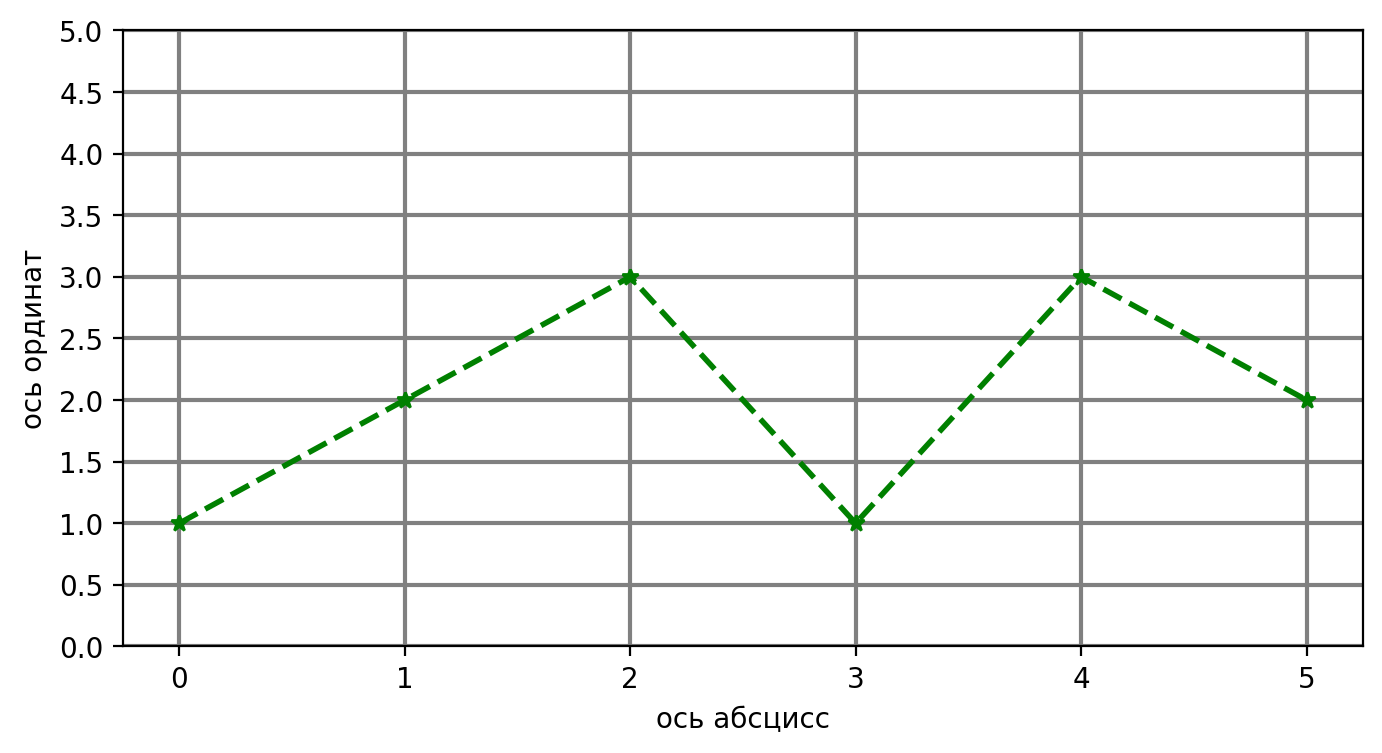

In [ ]:
x = [1,2,3,1,3,2]
x = np.array([1,2,3,1,3,2])
x = pd.Series(np.array([1,2,3,1,3,2]))

plt.figure(figsize=(8,4)) # можно указать явно ширину и высоту графика (строчка не обязательна)
plt.plot(x, linewidth=2, color='green', marker='*', linestyle='dashed', label='line_1')
plt.legend() # показывать легенду
plt.grid(color='gray', linestyle='-', linewidth=1.5) # включить отрисовку сетки c определенными параметрами
plt.yticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]) # можно явно указать, как подписывать ось
plt.xticks()
plt.xlabel('ось абсцисс')
plt.ylabel('ось ординат');

Другой пример - **scatter** (где точки не соединяются прямыми линиями), с указанием точек (x1,y1),(x2,y2),(x3,y3)…


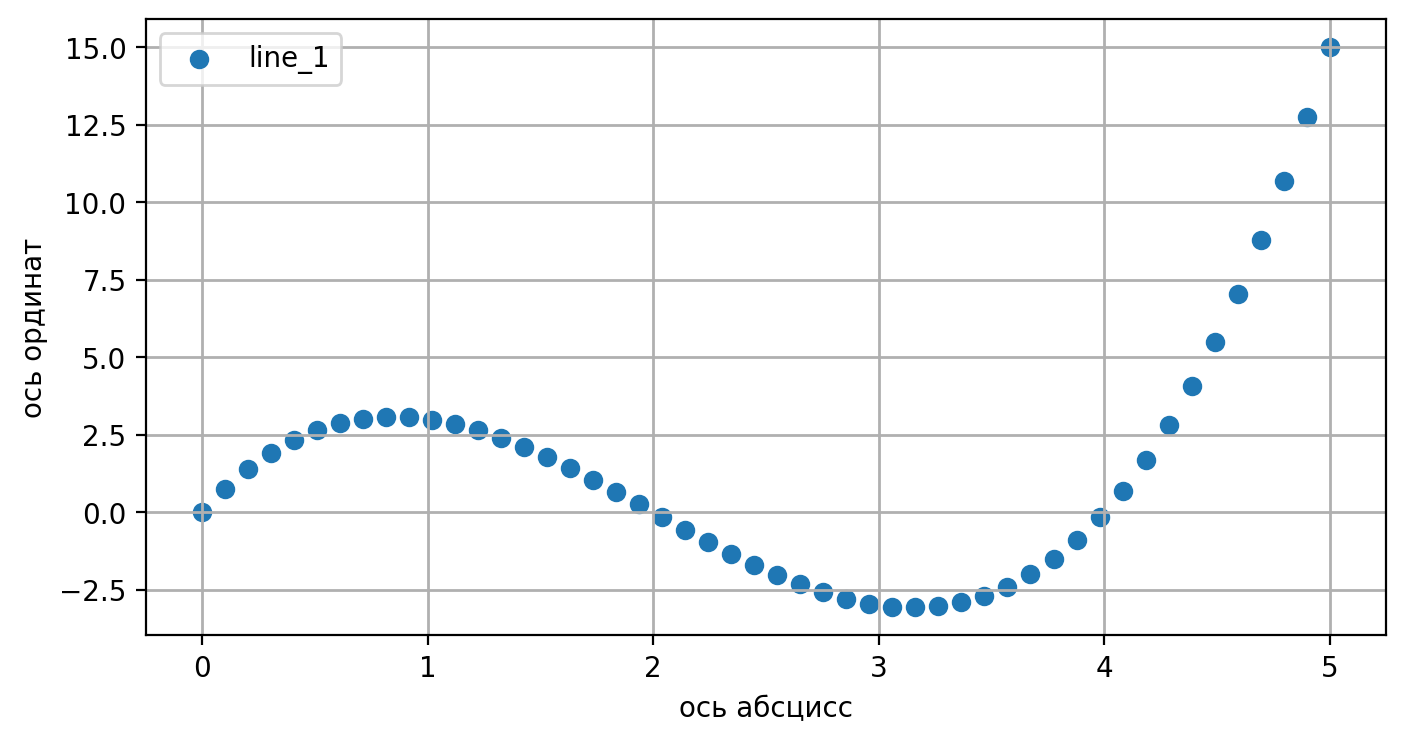

In [ ]:
x = np.linspace(0, 5, 50) # создаем массив из 100 чисел float от 0 до 5 с равномернов шагом
y = x*(x - 2)*(x - 4)

plt.figure(figsize=(8,4)) # можно указать явно ширину и высоту графика (строчка не обязательна)
plt.scatter(x, y, label='line_1')
plt.legend() # показывать легенду
plt.grid(linewidth=1) # включить отрисовку сетки c определенными параметрами
plt.yticks()
plt.xticks()
plt.xlabel('ось абсцисс')
plt.ylabel('ось ординат');


**Гистограмма** - график, показывающий распределение какой-либо величины, встречающуюся в данном объеме значений. По другому, график показыват сколько раз встречается из выборки каждое значение в ней. Построим гистограммы с помощью разных библиотек.
Один из главных параметров bins - обратная величина к ширине столбцов на графике

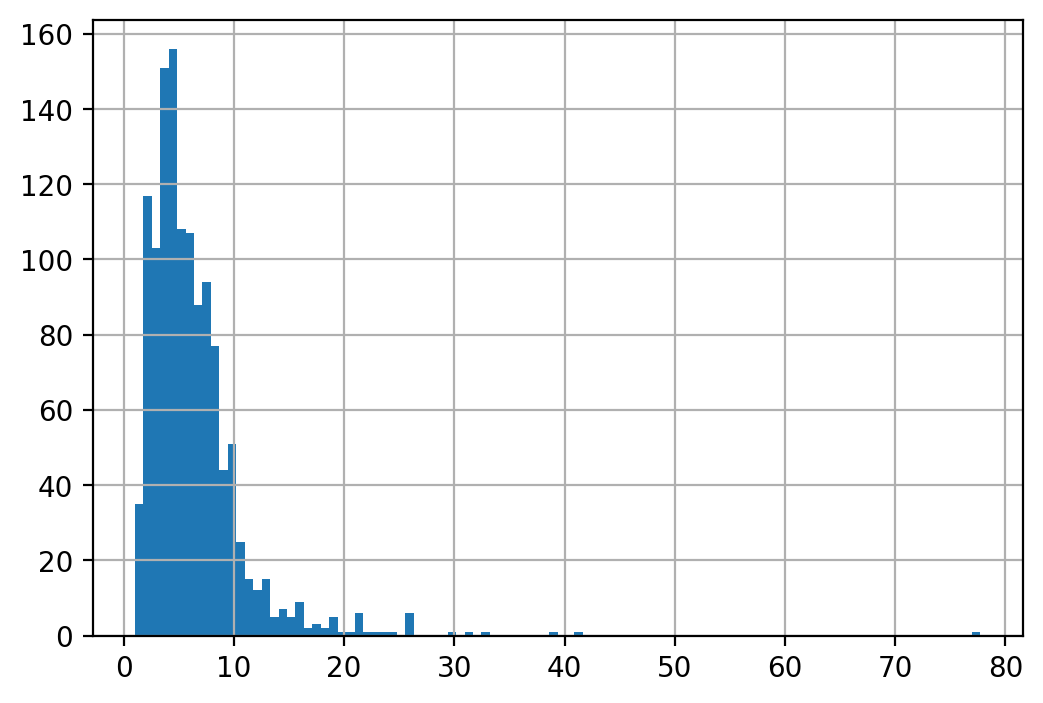

In [ ]:
df['wage'].hist(figsize=(6, 4), bins=100);

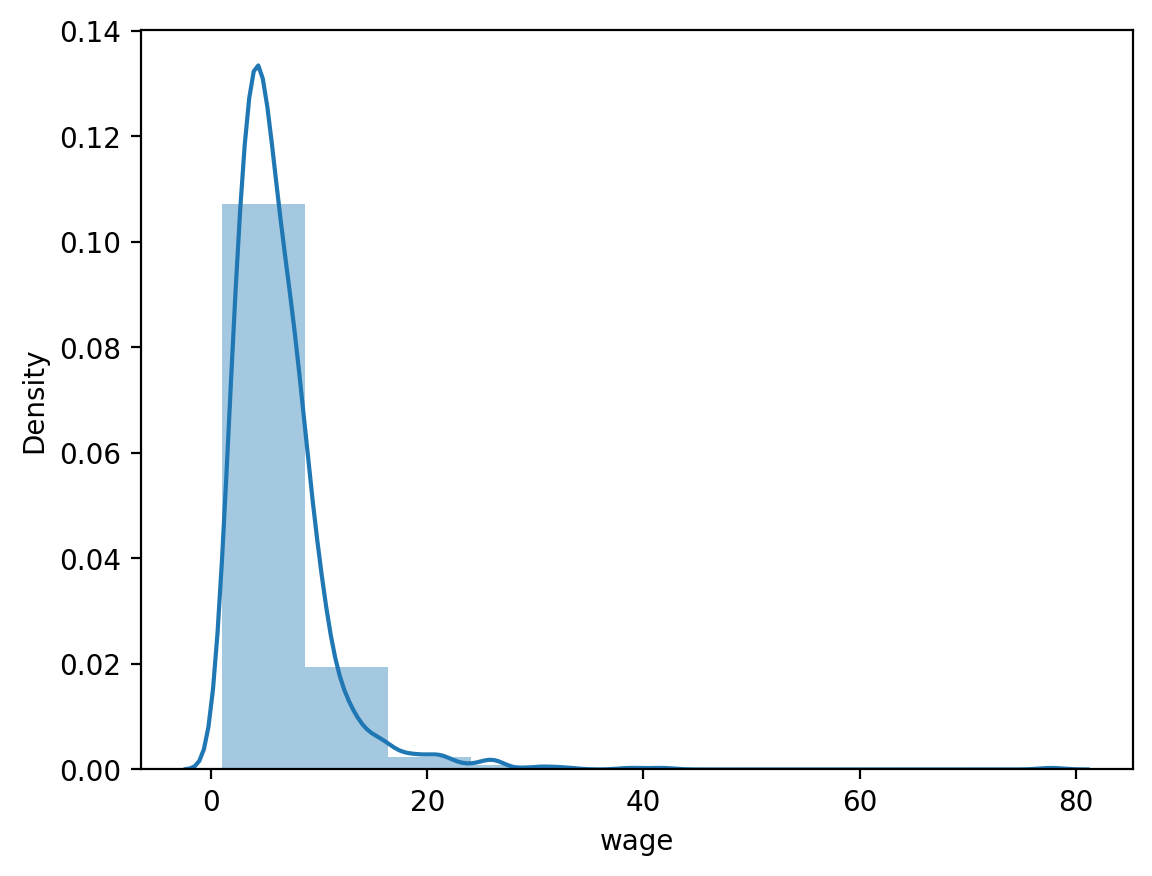

In [ ]:
sns.distplot(df['wage'], bins=10);

Можно сразу построить несколько гистограмм, относящихся к разным столбцам данных:



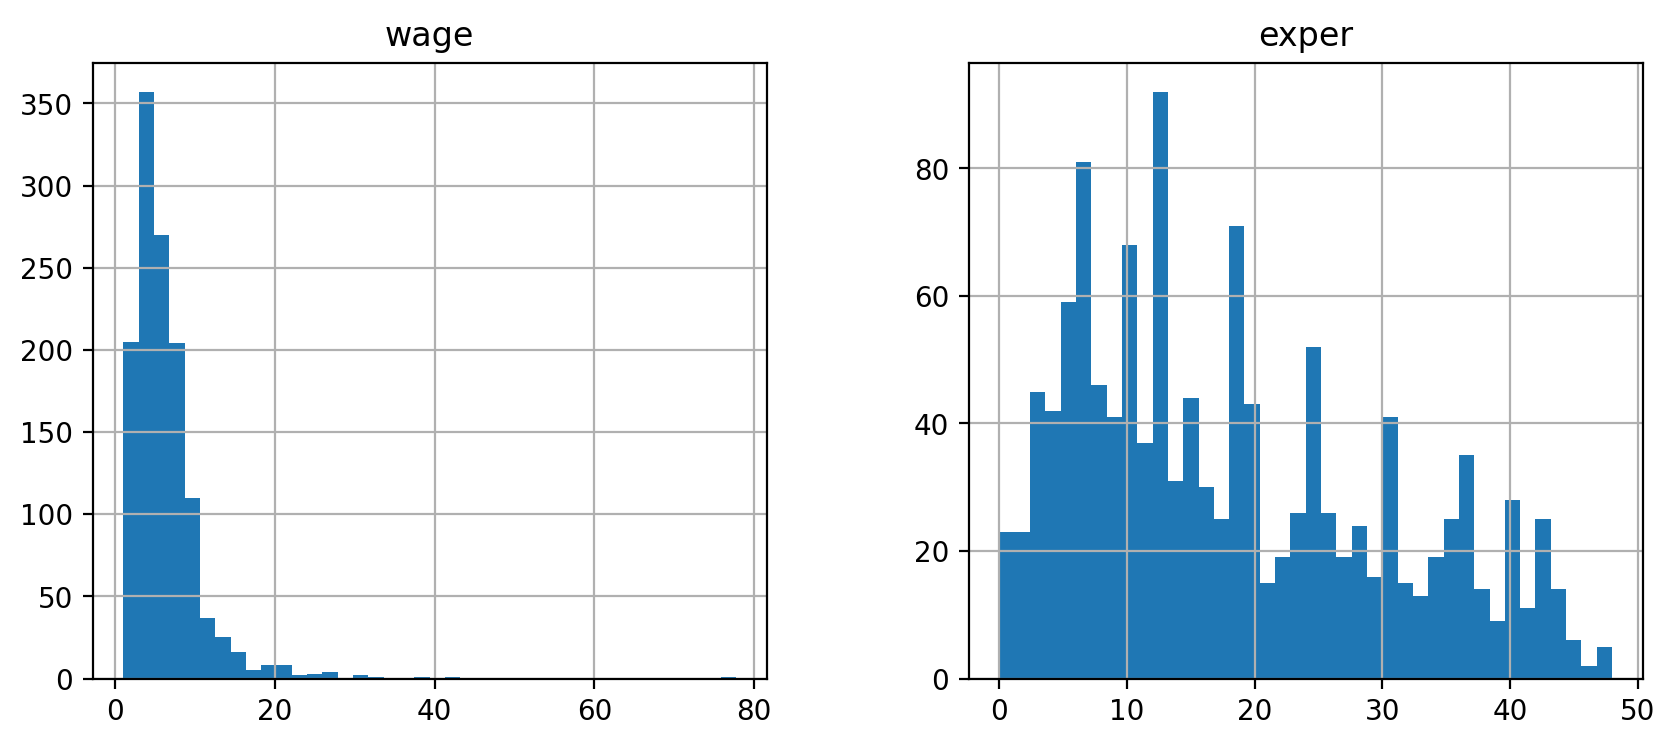

In [ ]:
features = ['wage', 'exper']
df[features].hist(figsize=(10, 4), bins=40);

**CountPlot** - столбчатая диаграмма, чаще всего используется для категориальных признаков в данных. Показывает, сколько трочек в df имеют каждое из выбранного значения категориального признака.

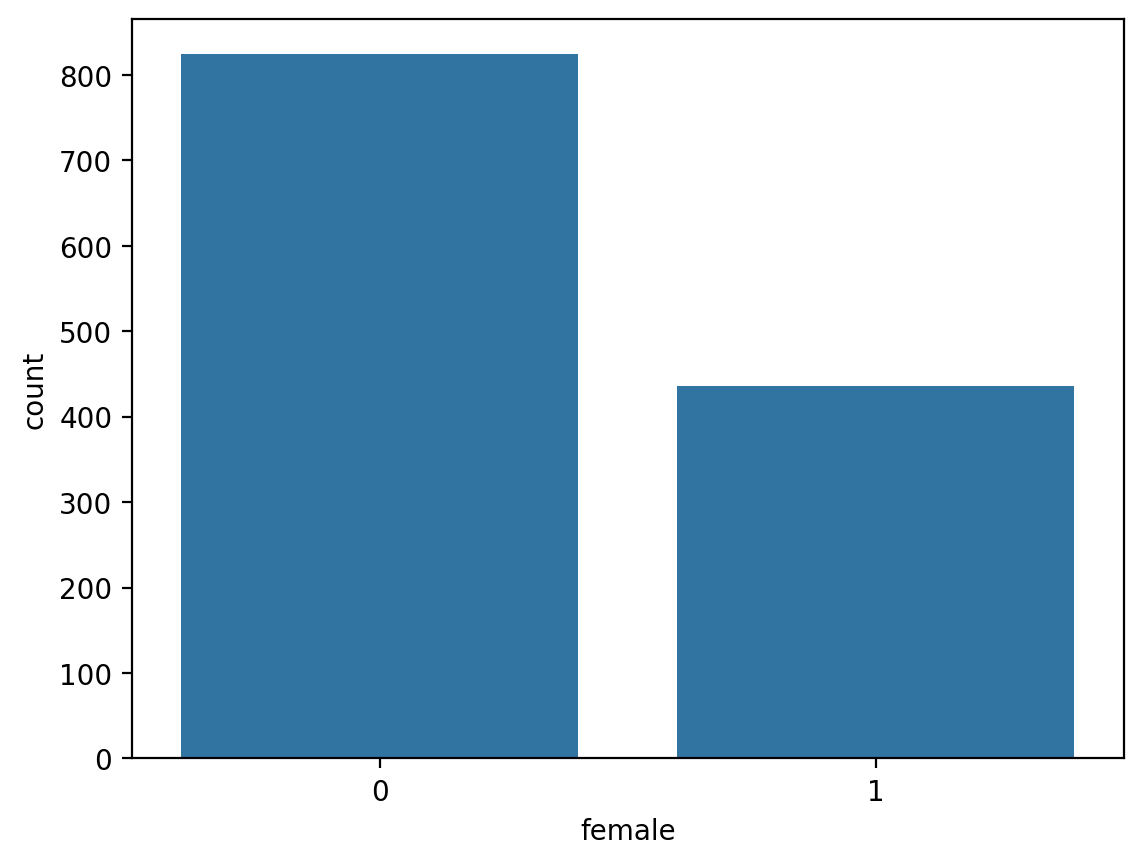

In [ ]:
sns.countplot(x='female', data=df);

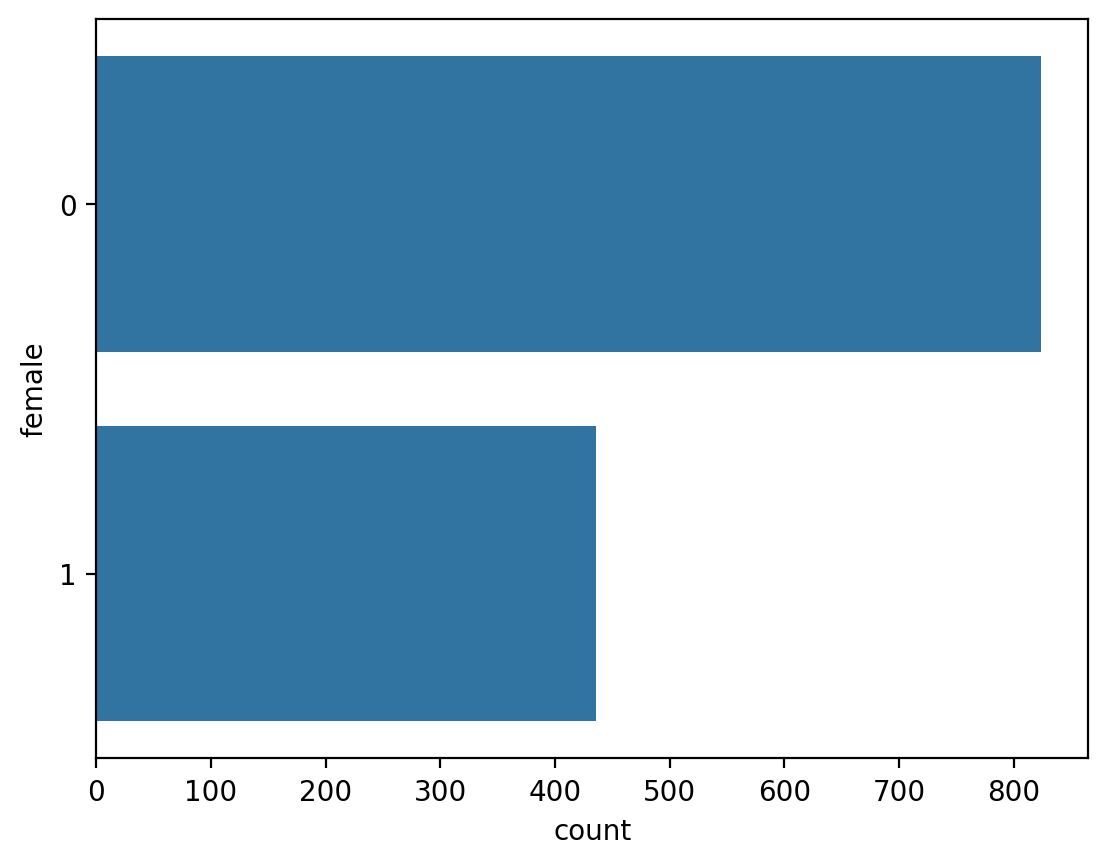

In [ ]:
sns.countplot(y='female', data=df);


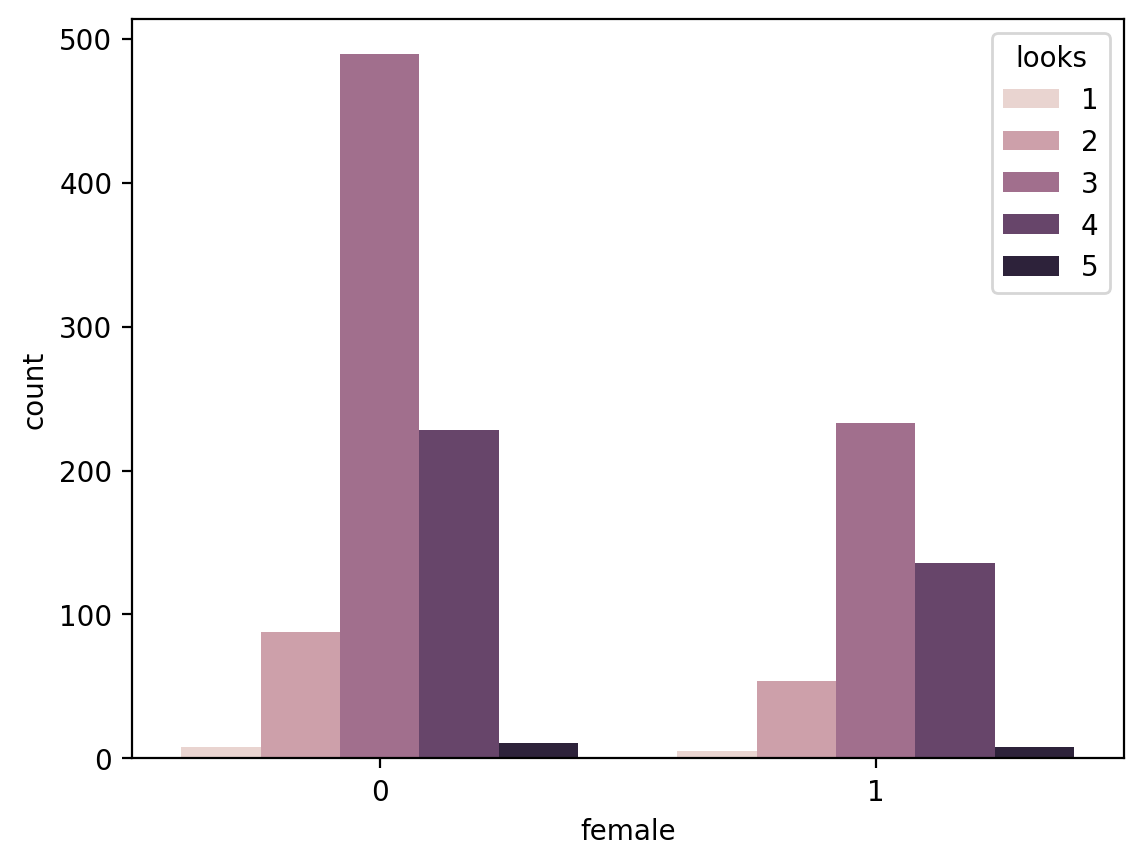

In [ ]:
sns.countplot(x='female', hue='looks', data=df);

## Несколько графиков на одно картинке

На следующем примере покажем, как нарисовать несколько графиков на одной картинке: axes - части графика. axes[0] - левая часть, а axes[1] - правая. Аналогично можно создать сетку 2х2 для 4х графиков (но для 4х графиков нужно указывать уже 2 координаты, например, ax=axis[1][1]).

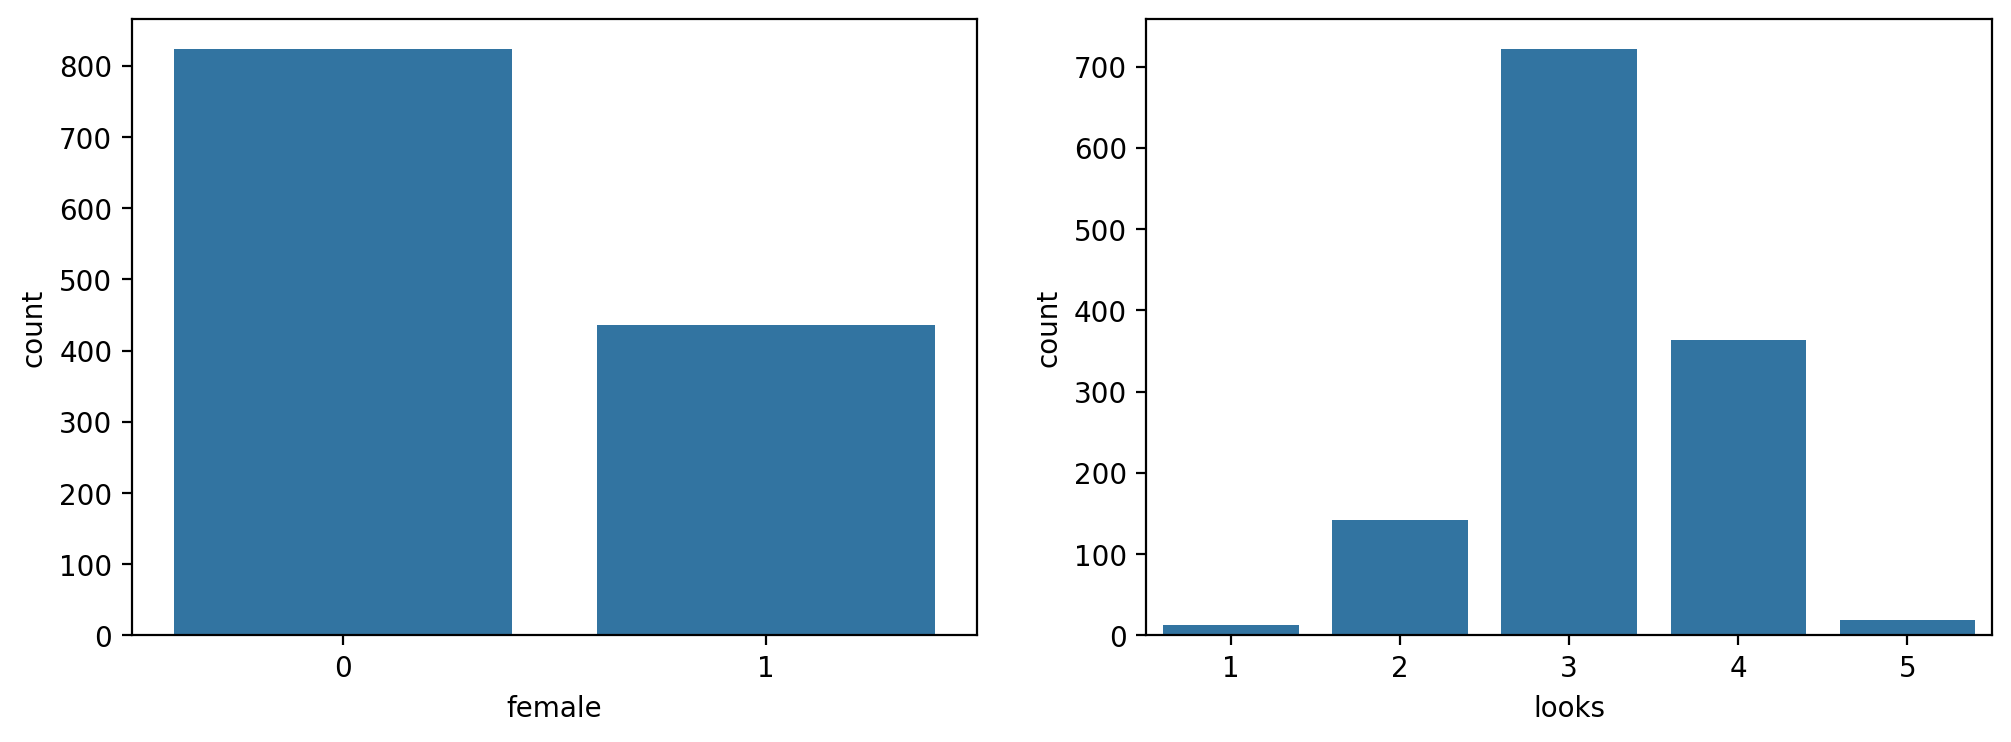

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='female', data=df, ax=axes[0]);
sns.countplot(x='looks', data=df, ax=axes[1]);

**Круговая диаграмма** отлично показывает соотношение частей:


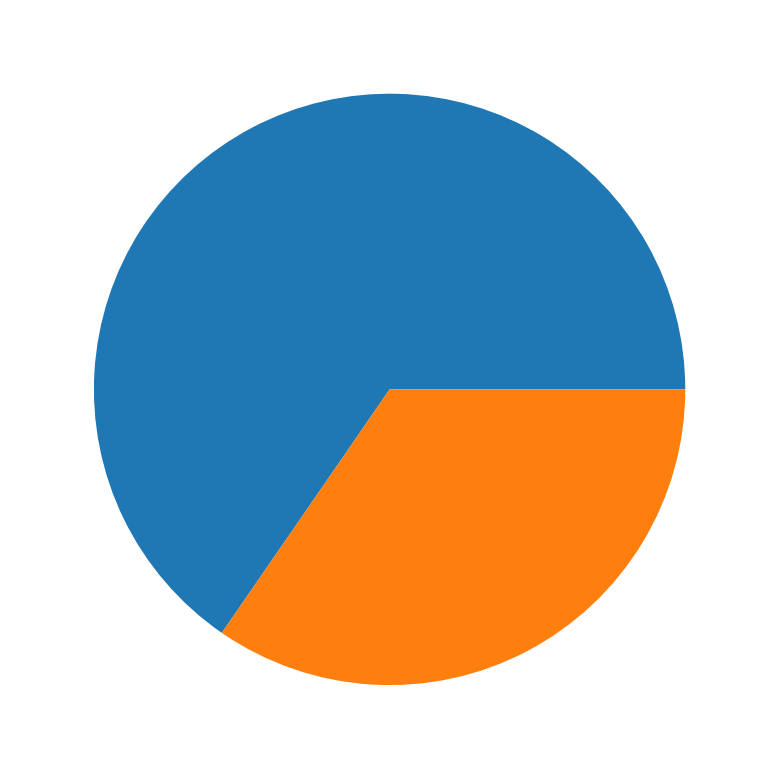

In [ ]:
plt.pie(df.groupby('female')['wage'].count());

**Ящик с усами, или boxplot**



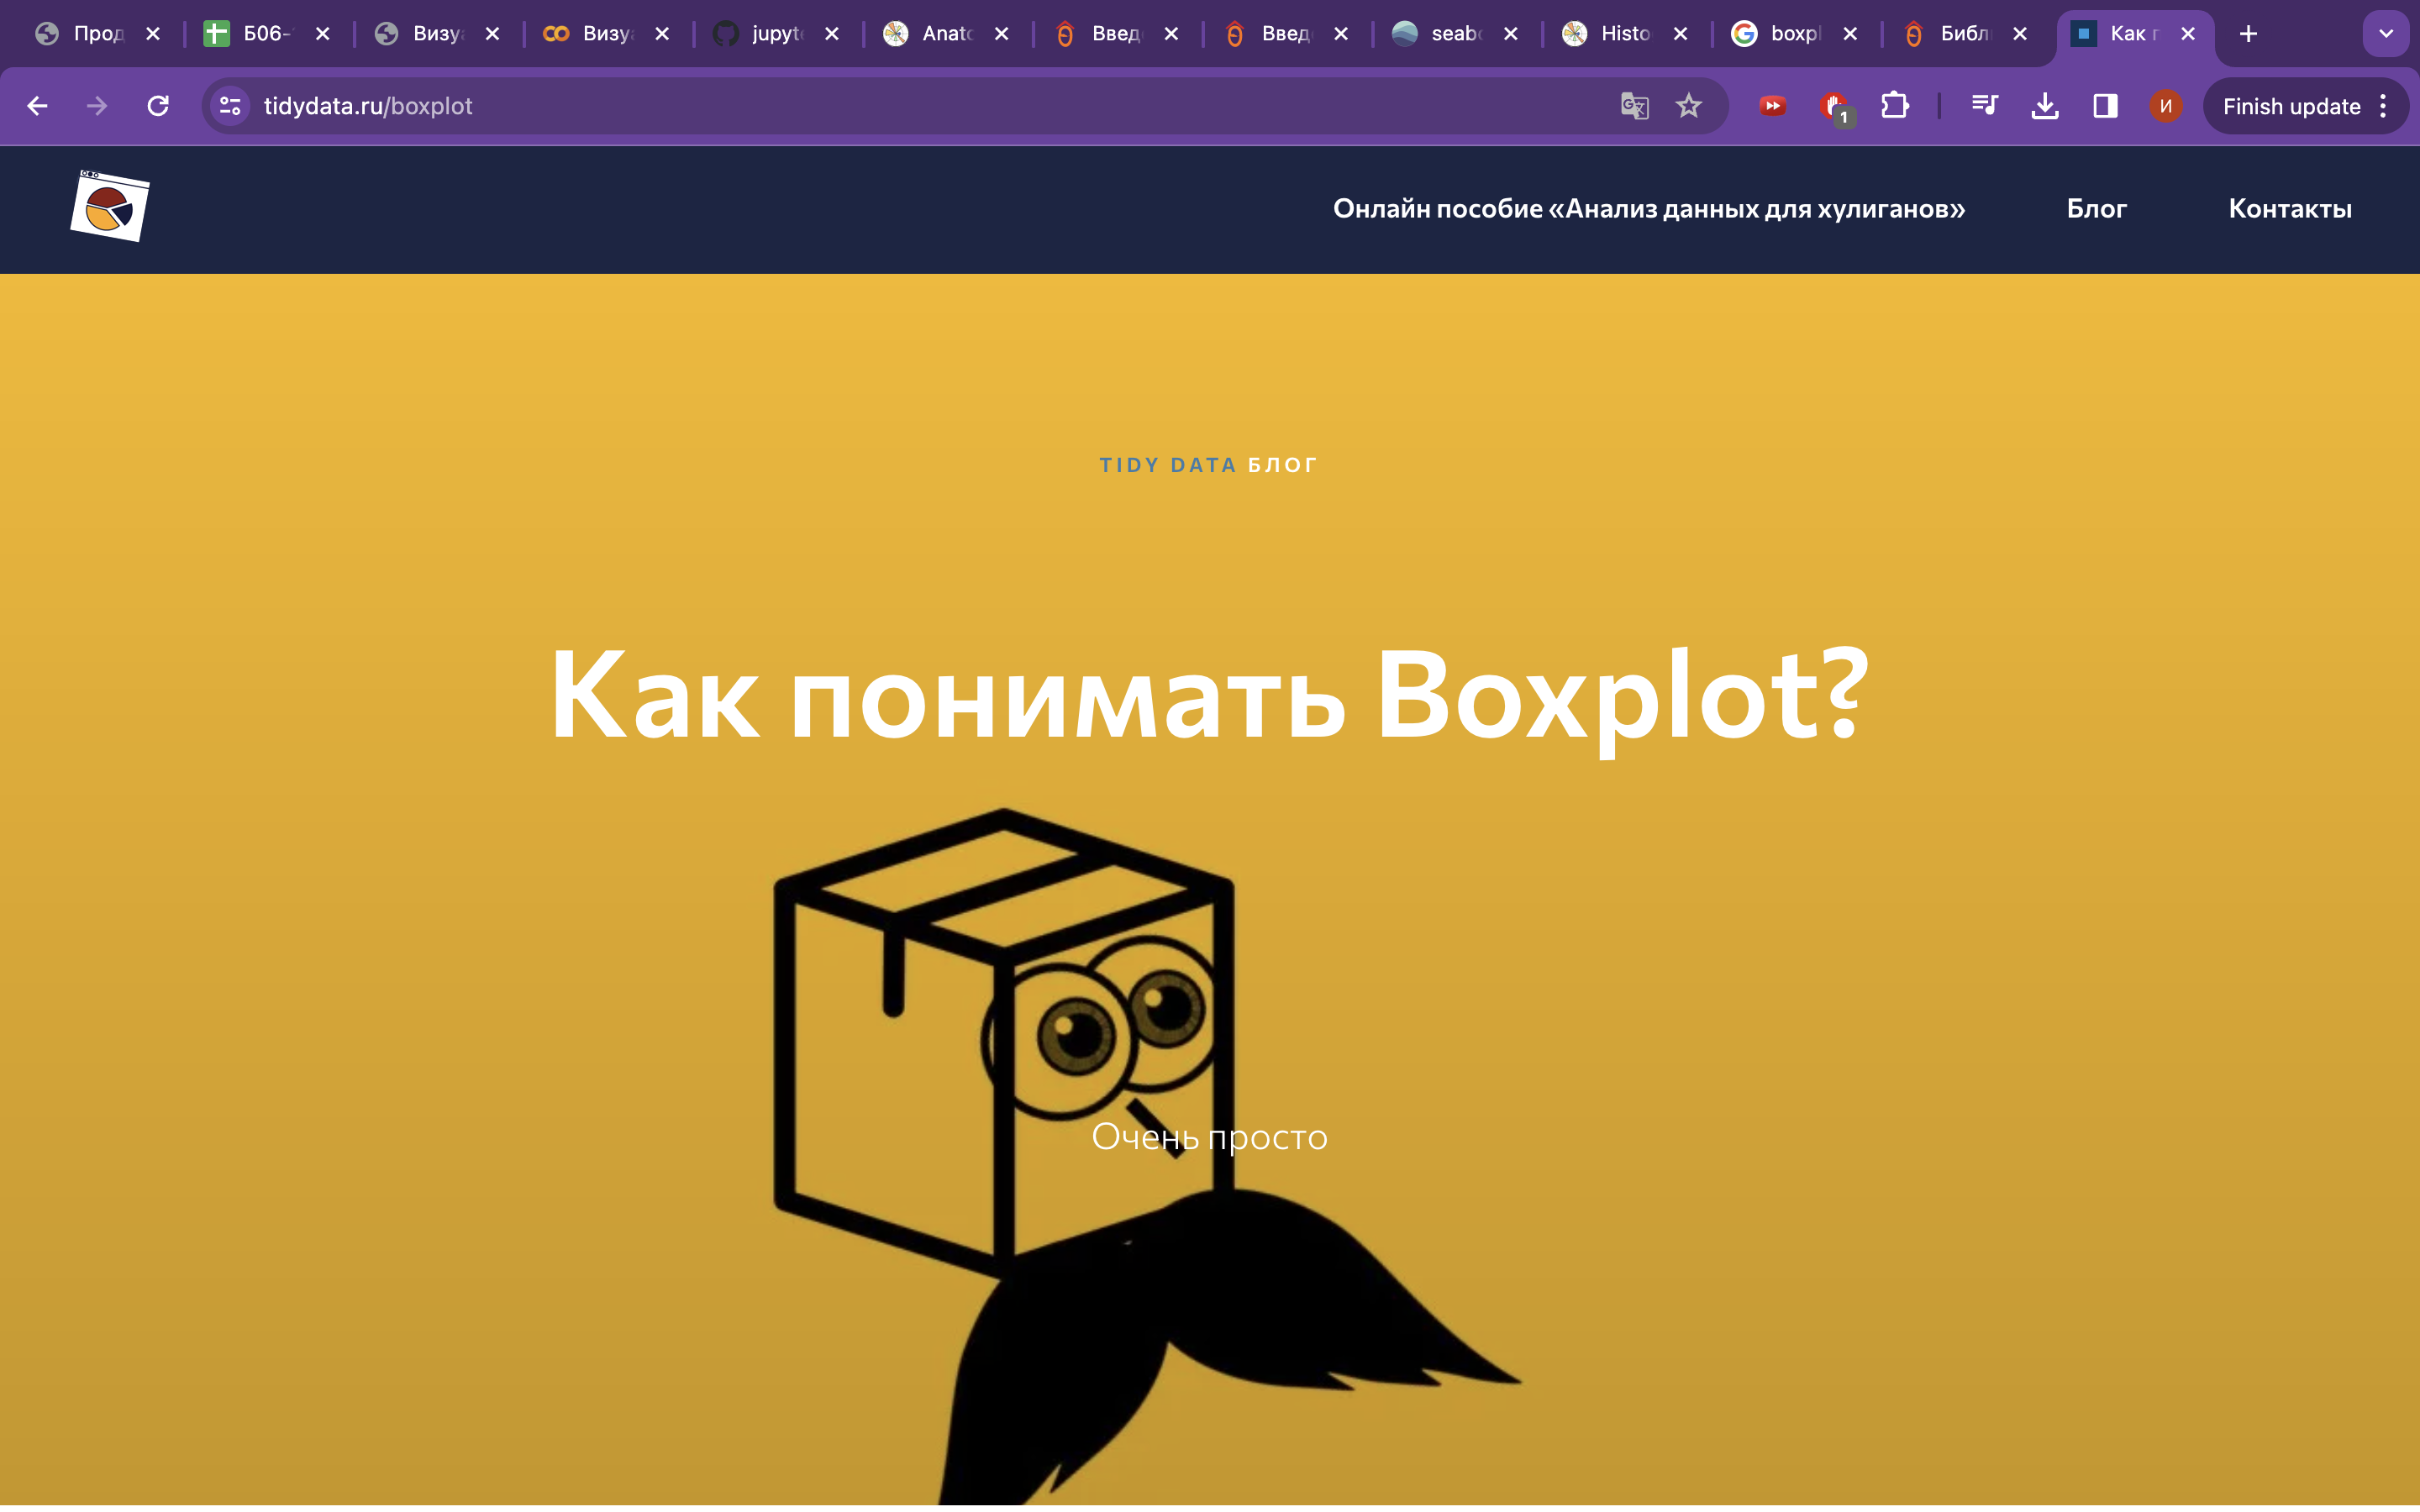

реально очень просто и понятно написано [тут](https://www.tidydata.ru/boxplot)

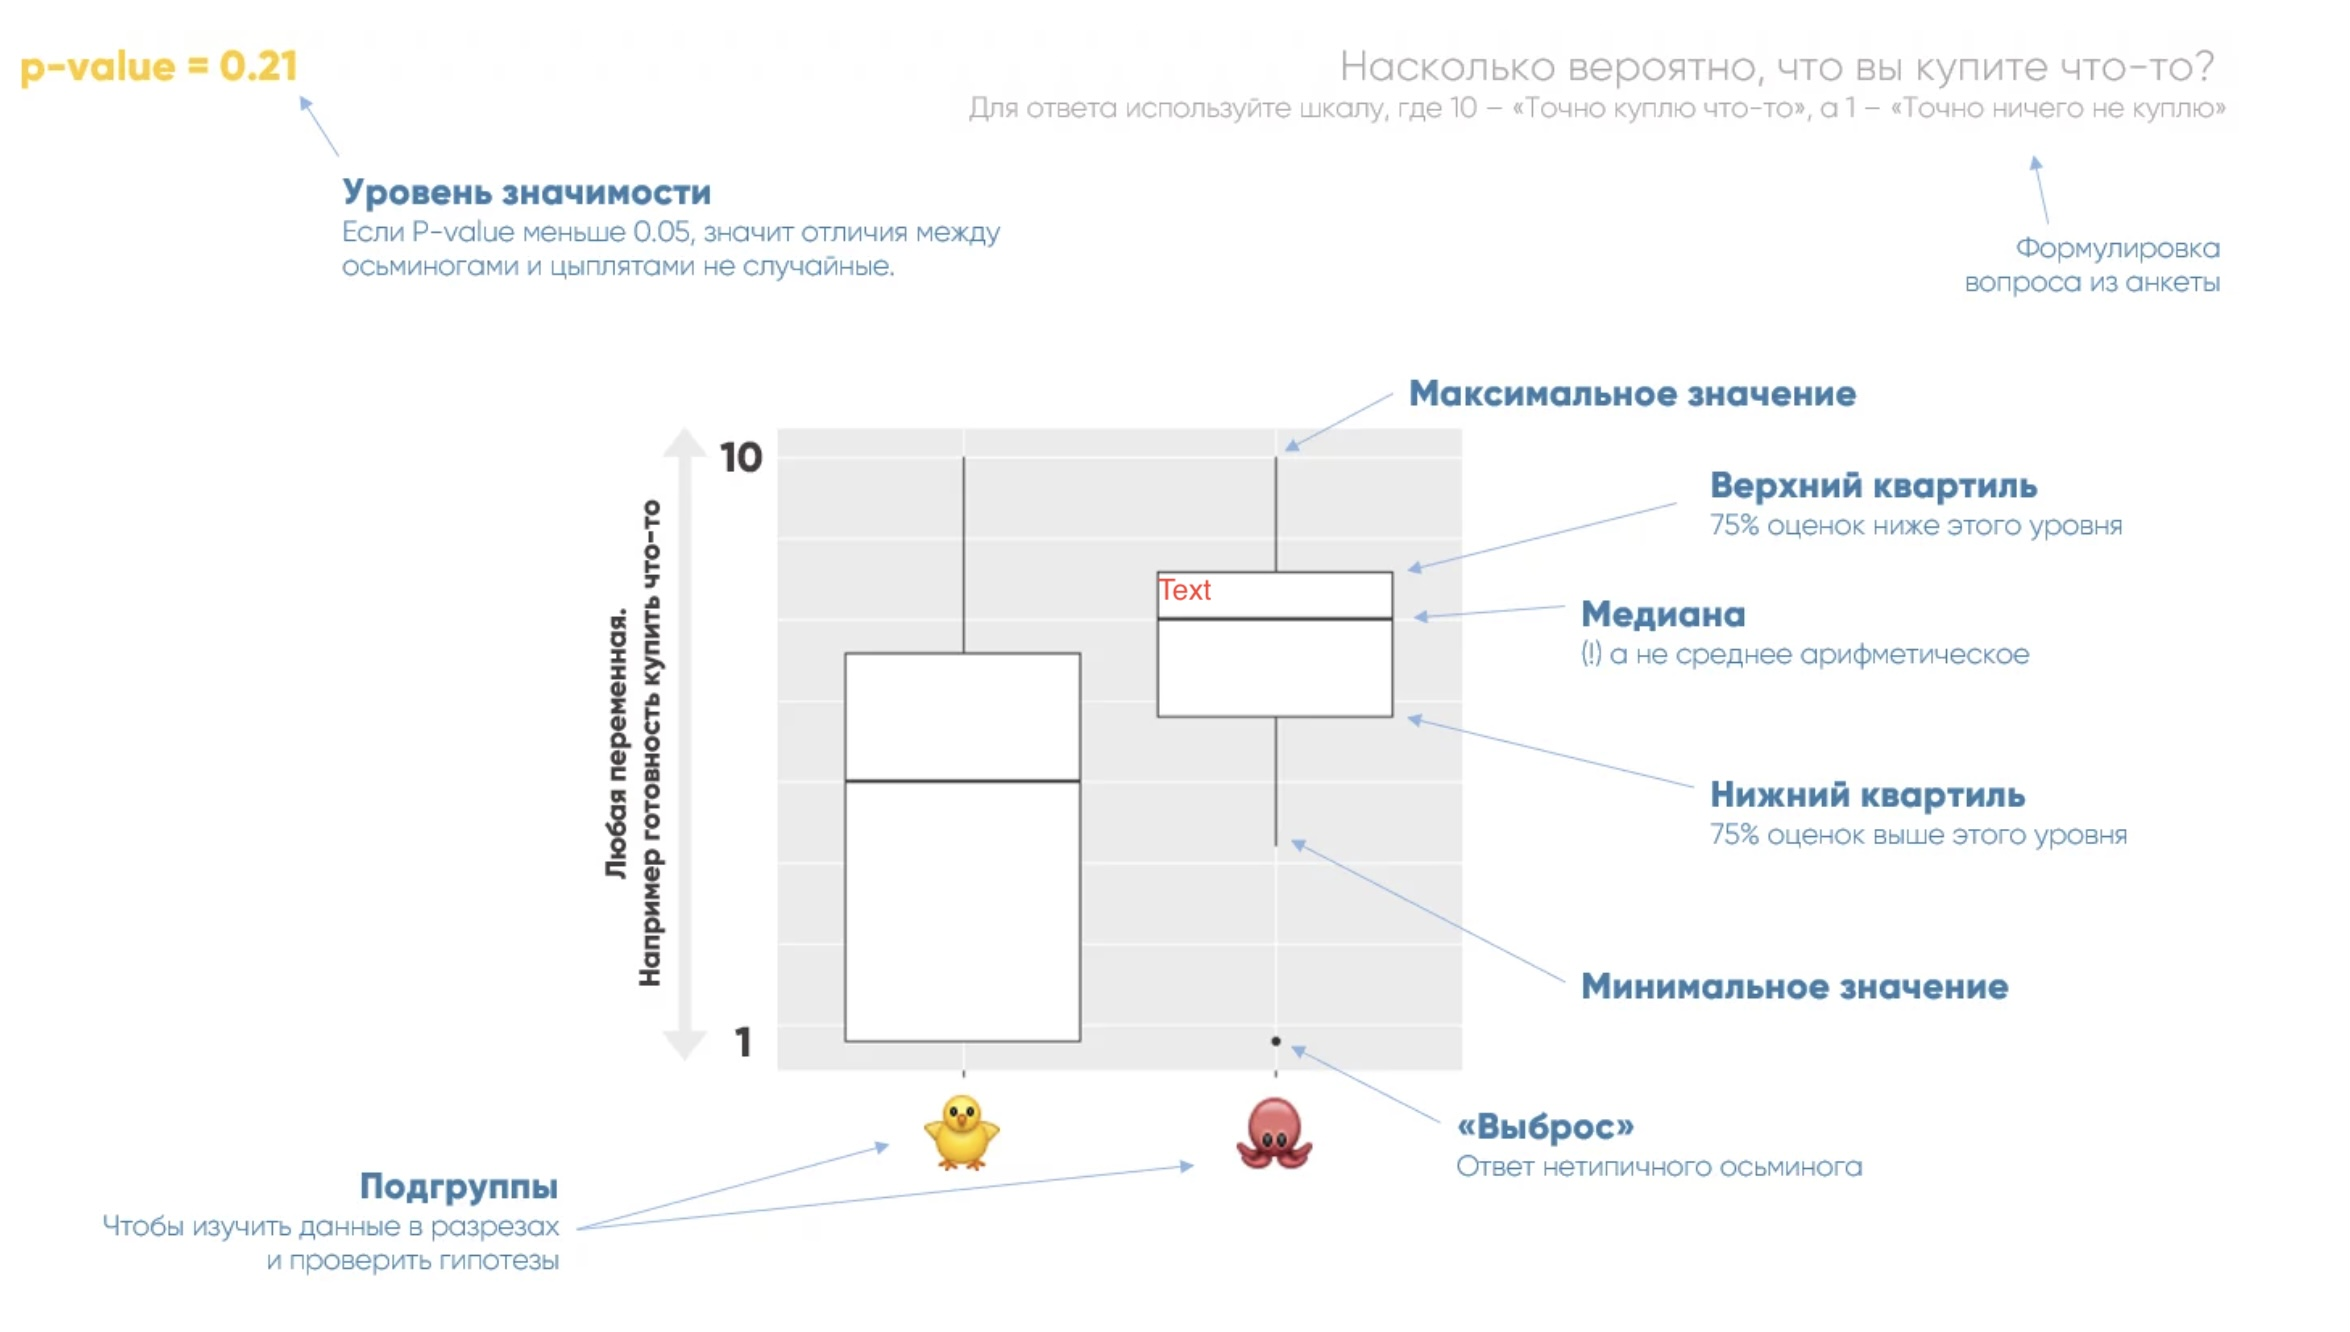

**Межквартильный размах (МКР)** – это разница между 75% и 25% квартилем. Внутри этого диапазона лежит 50% наблюдений. Если диапазон узкий (как в случае с осьминогами), значит члены подгруппы единогласны в своих оценках. Если широкий – значит однородного мнения нет (как у цыплят).

**Выбросы**– это нетипичные наблюдения. Что именно считать нетипичным? Зависит от контекста, но можно прибегнуть к следующем расчетам:

**Выбросы** – это значения за пределами:
* 25% перцентили минус 1.5 х МКР
* 75% перцентили плюс 1.5 х МКР

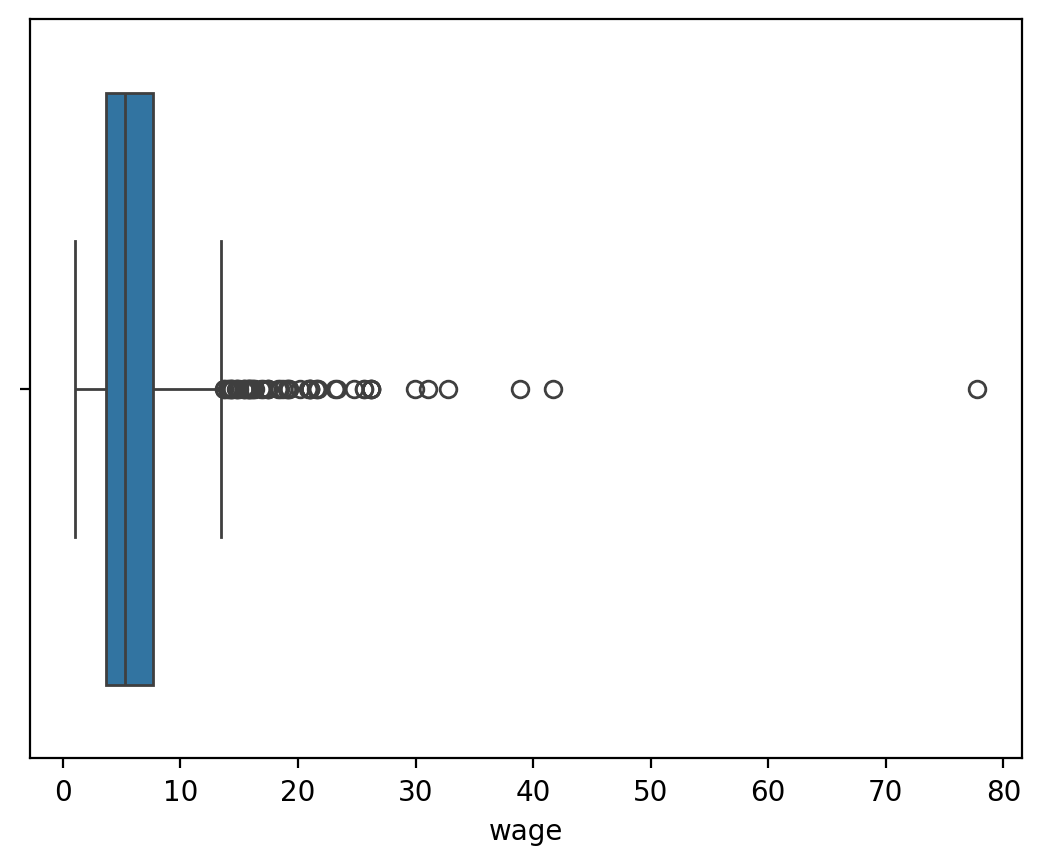

In [ ]:
sns.boxplot(x='wage', data=df);

##Отступление: ядерная оценка плотности

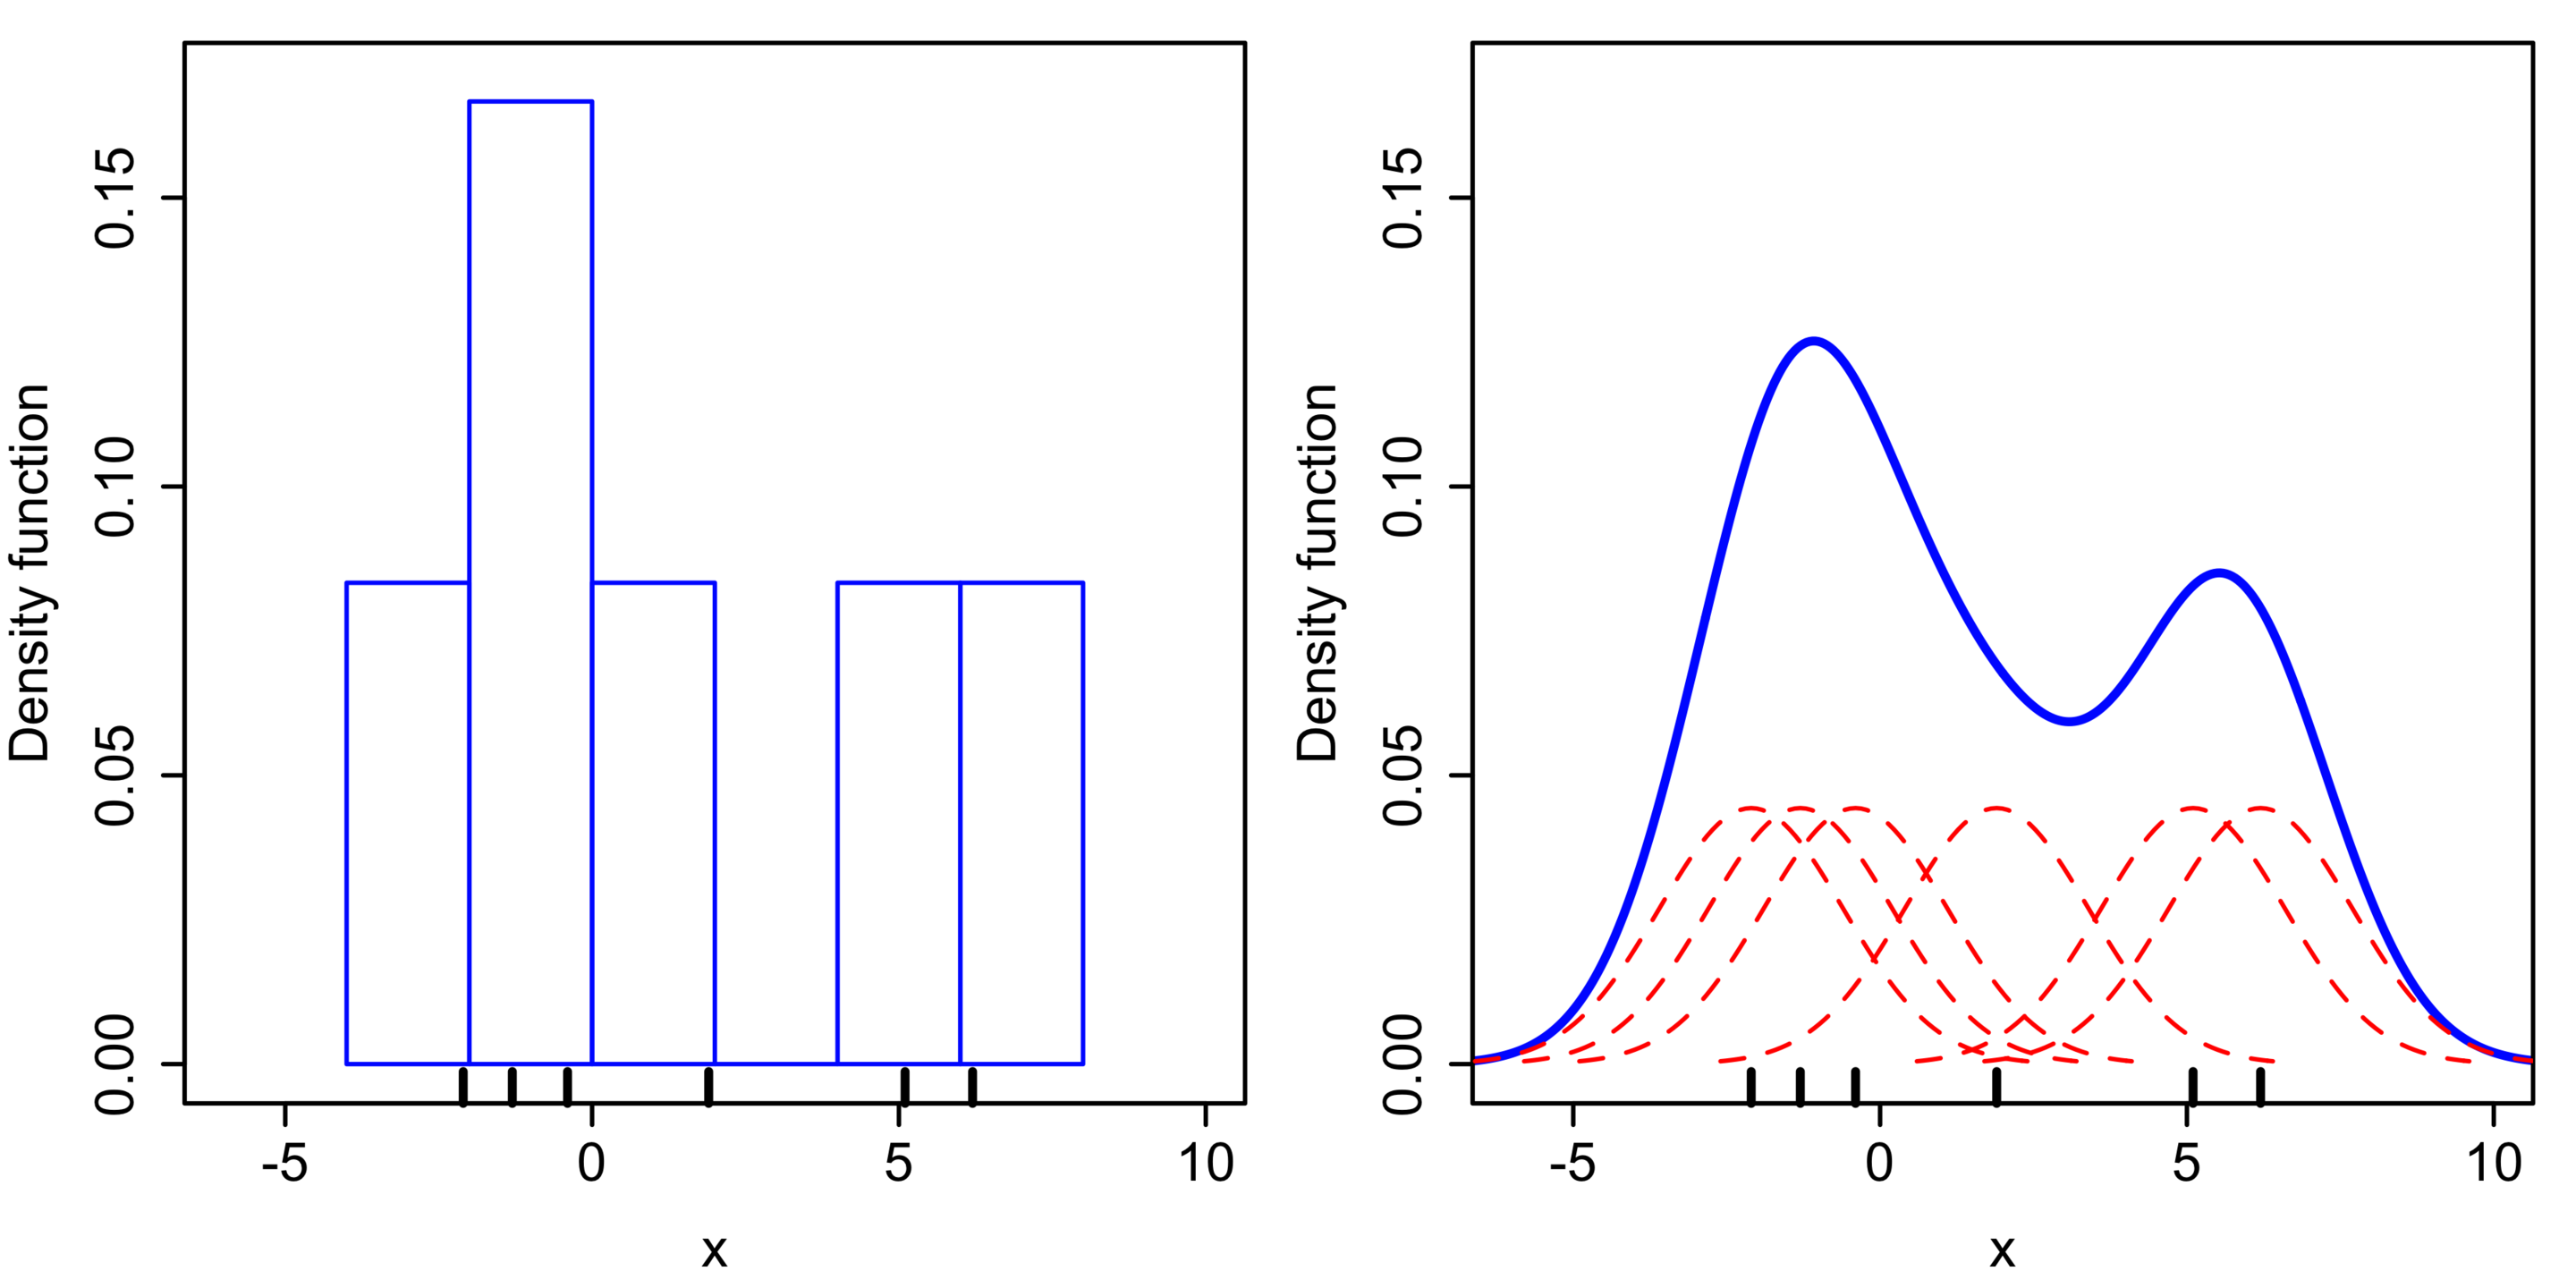

**violin plot** -- комбинация boxplot и ядерной оценки плотности

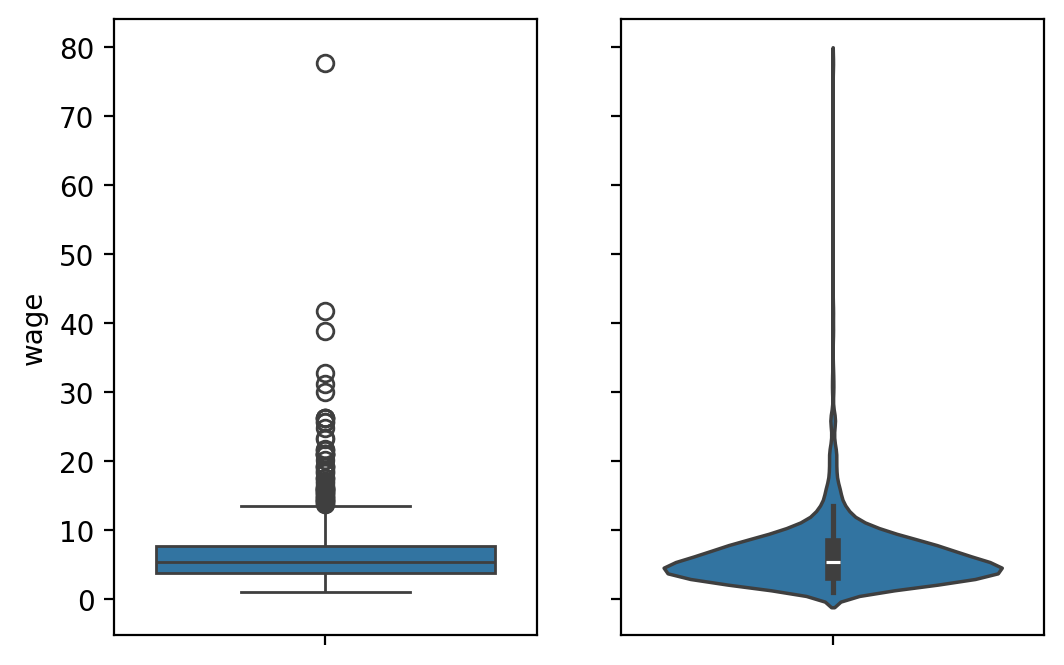

In [ ]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['wage'], ax=axes[0]);
sns.violinplot(data=df['wage'], ax=axes[1]);

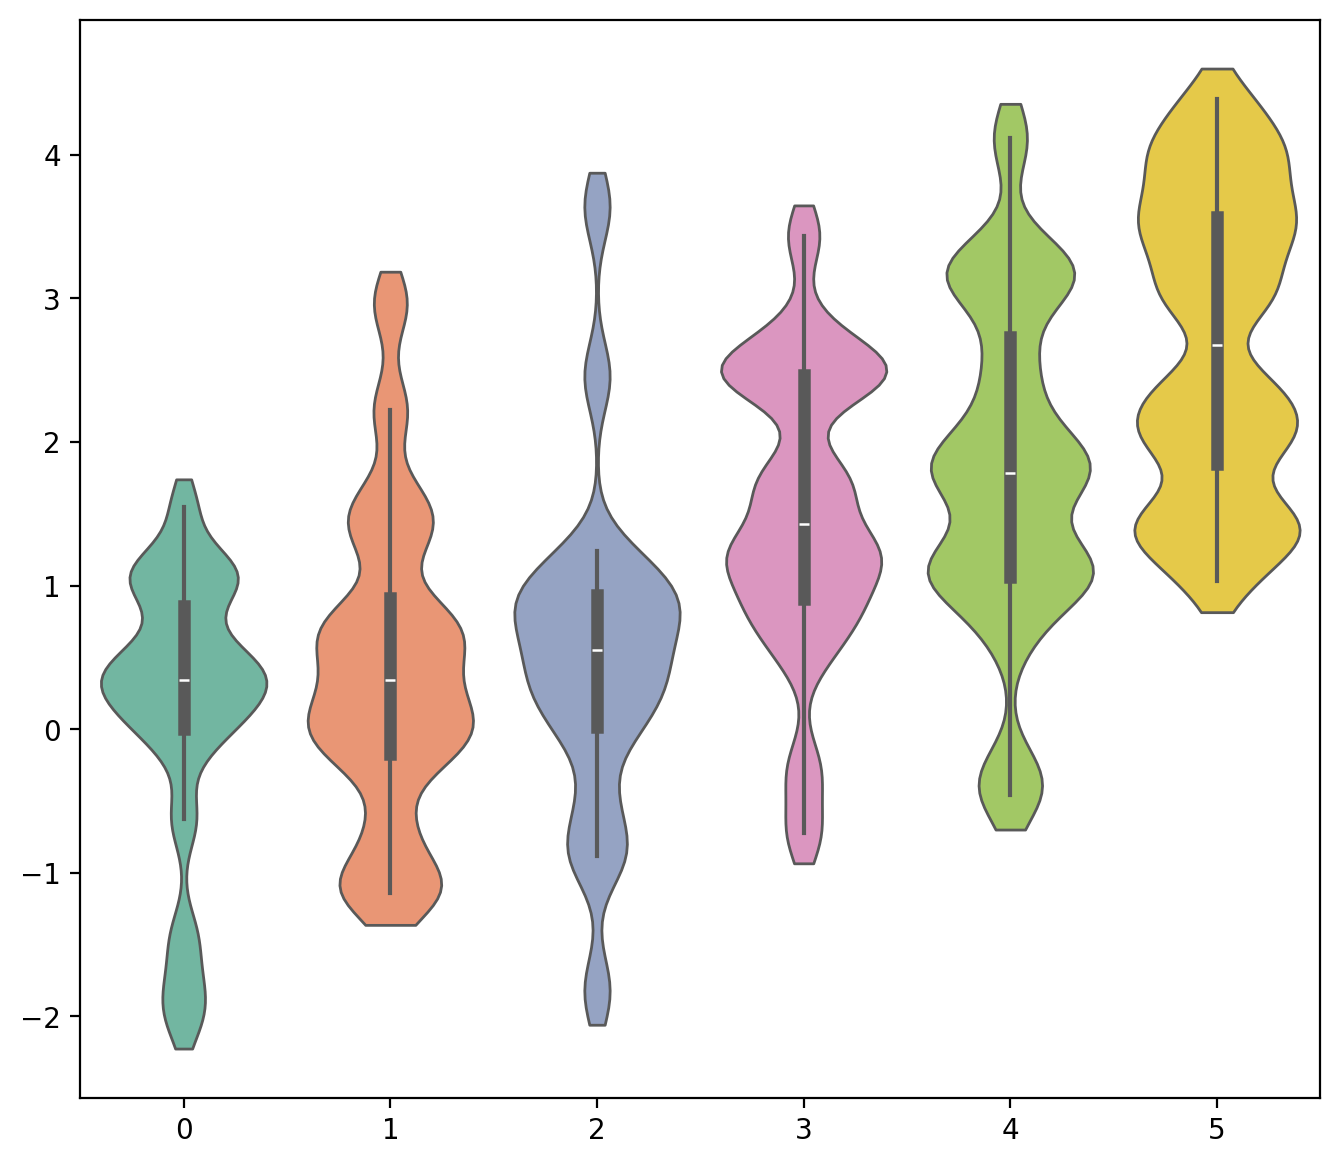

In [ ]:
import scipy.stats as sps
data = sps.norm.rvs(size=(20, 6)) + np.arange(6) / 2

plt.figure(figsize=(8, 7))
sns.violinplot(data=data, palette='Set2', bw=.2, cut=1, linewidth=1);

**joint plot**: Для того, чтобы подробнее посмотреть на взаимосвязь двух численных признаков, есть еще и joint plot — это гибрид scatter plot и histogram. Посмотрим на то, как связаны между собой wage и exper.

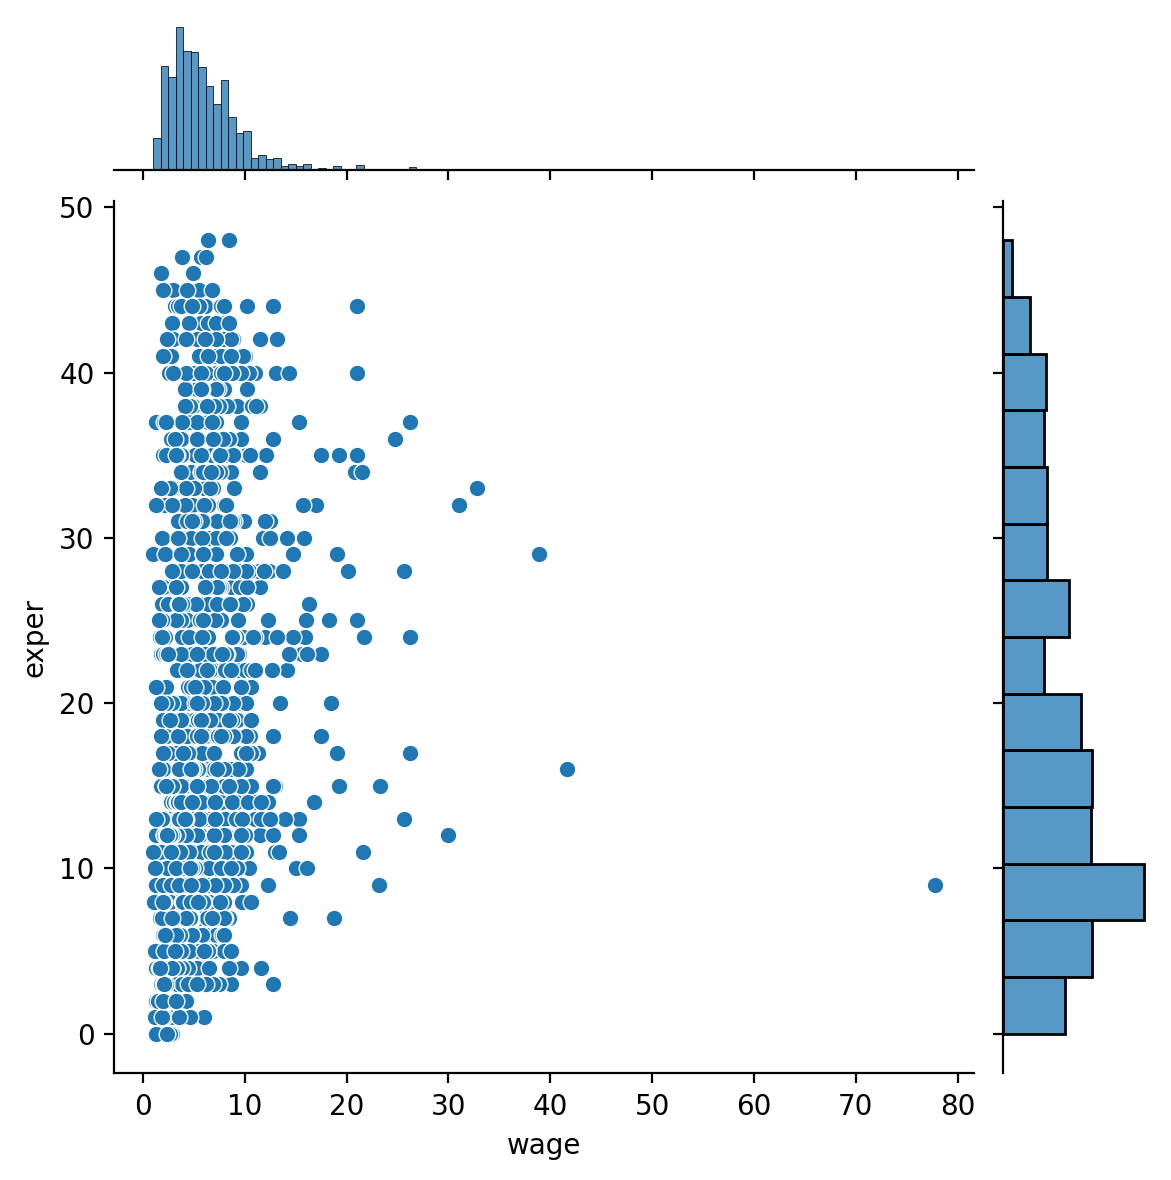

In [ ]:
sns.jointplot(x='wage', y='exper', data=df, kind='scatter');


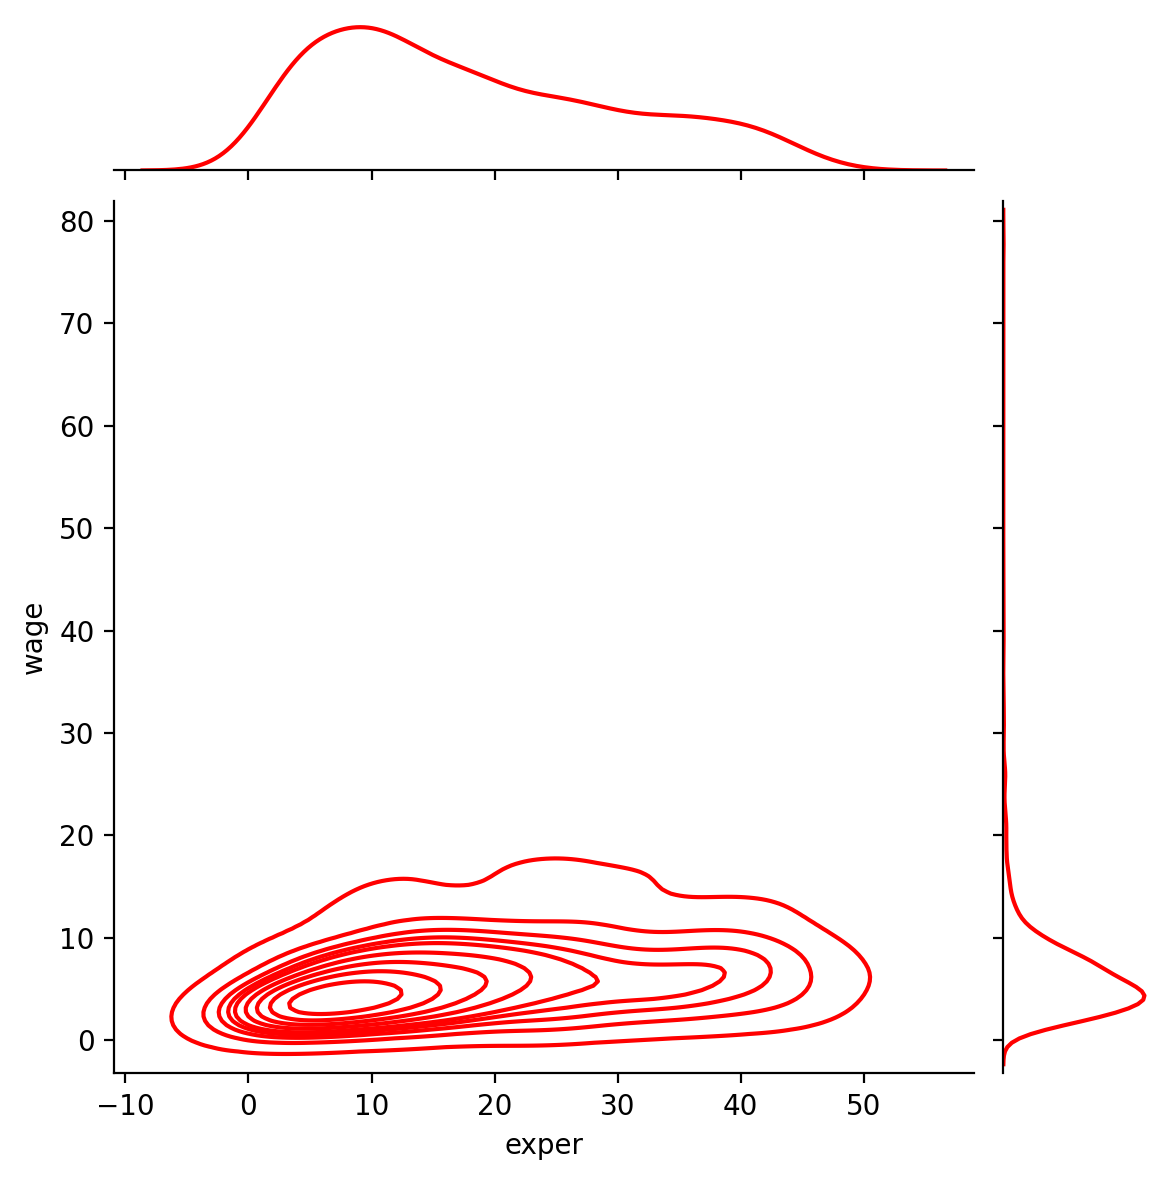

In [ ]:
sns.jointplot(x = 'exper', y = 'wage', data=df, kind="kde", color="r");


После всего вышесказанного, нужно отметить, что можно делать некоторые операции над DataFrame, и уже к ним применять метод .plot(…).

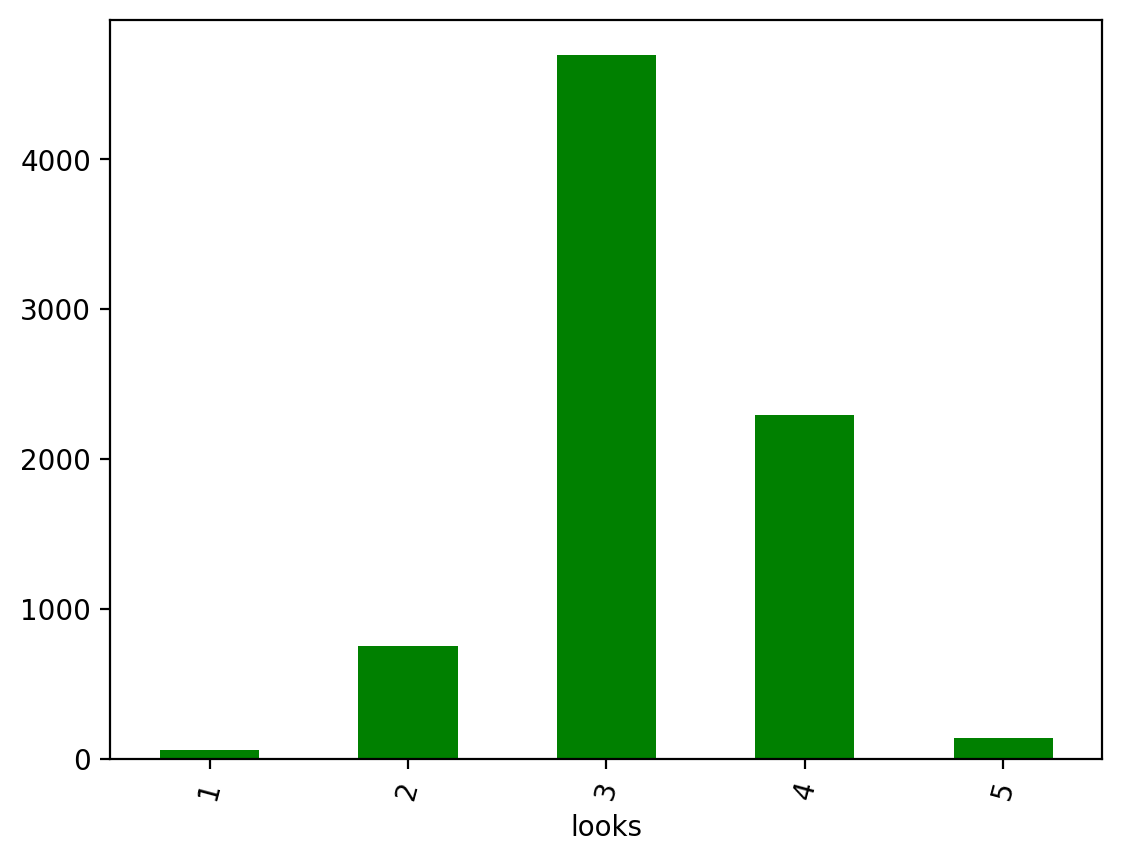

In [ ]:
df.groupby('looks').wage.sum().plot(kind='bar', rot=75, color='green');

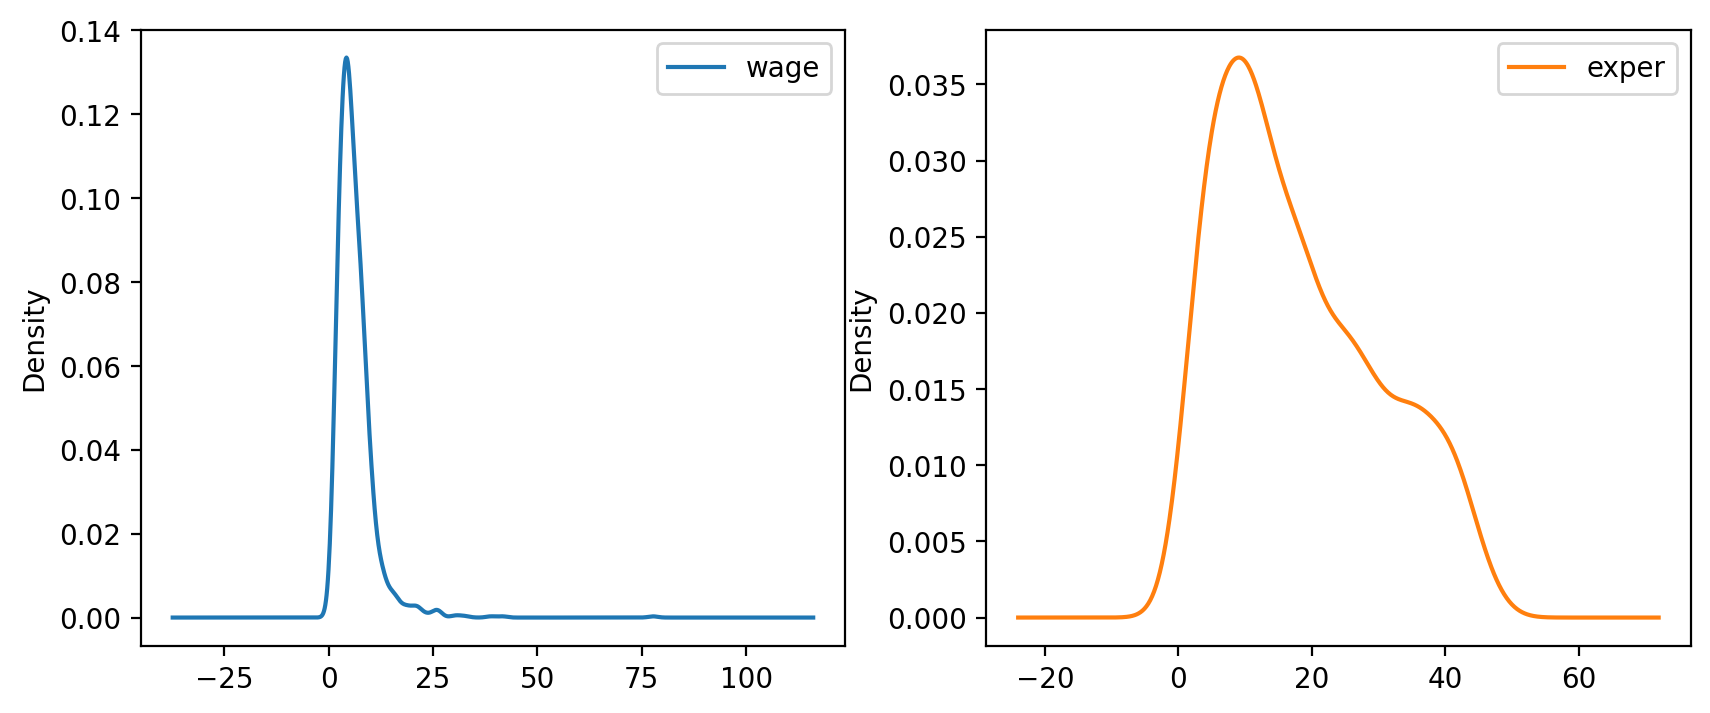

In [ ]:
df[features].plot(kind='density', subplots=True, layout=(1, 2),
                  sharex=False, figsize=(10, 4));

#3D-визуализация

Нарисуем линию в 3D:

In [ ]:
t = np.linspace(0, 4 * np.pi, 100)
x = np.cos(t)
y = np.sin(t)
z = t / (4 * np.pi)


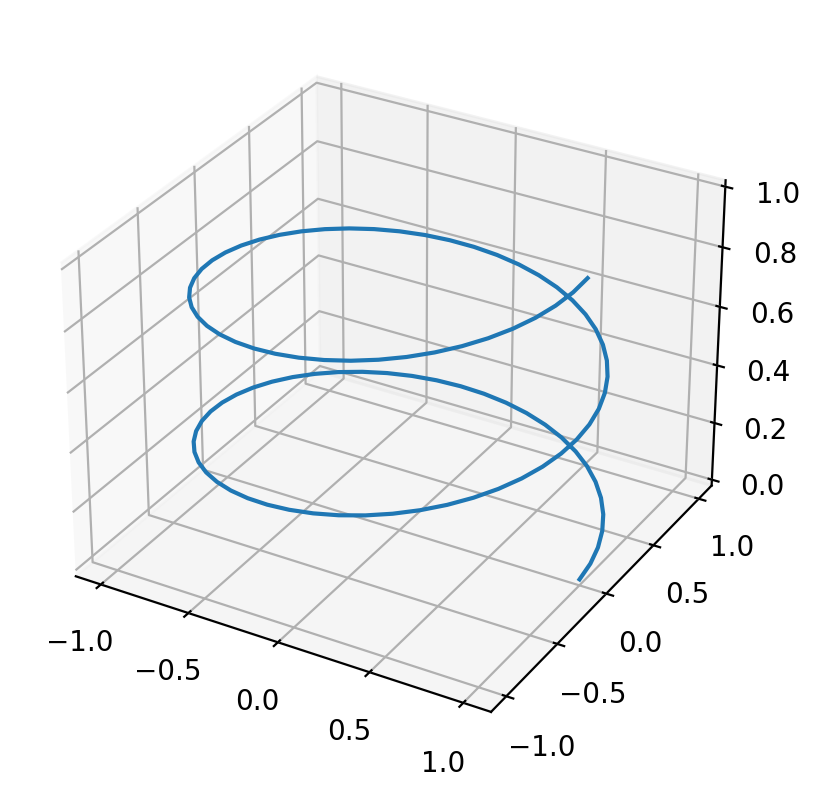

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot(x, y, z)
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.elev, ax.azim = 45, 30
ax.plot(x, y, z)
plt.show()

## Создание анимации

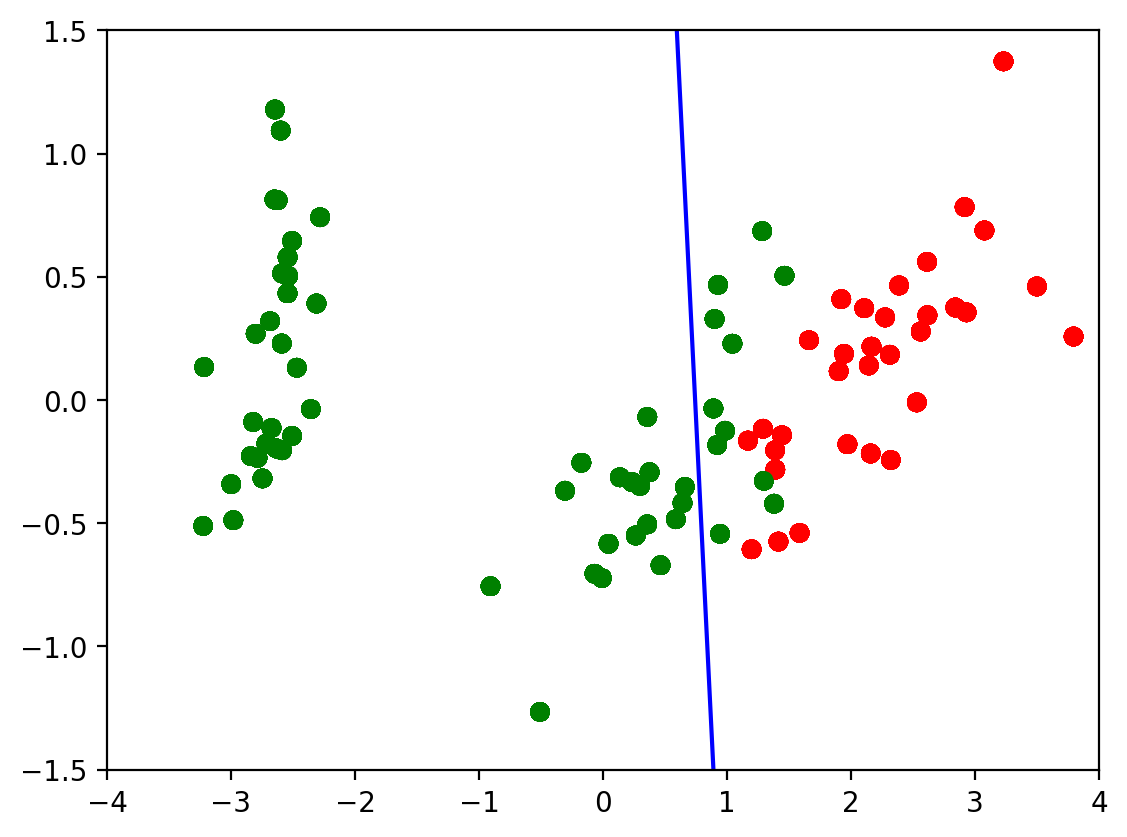

In [ ]:
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter
import matplotlib.lines as mlines

from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

def newline(p1, p2, color=None): # функция отрисовки линии
    #function kredits to: https://fooobar.com/questions/626491/how-to-draw-a-line-with-matplotlib
    ax = plt.gca()
    xmin, xmax = ax.get_xbound()

    if(p2[0] == p1[0]):
        xmin = xmax = p1[0]
        ymin, ymax = ax.get_ybound()
    else:
        ymax = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmax-p1[0])
        ymin = p1[1]+(p2[1]-p1[1])/(p2[0]-p1[0])*(xmin-p1[0])

    l = mlines.Line2D([xmin,xmax], [ymin,ymax], color=color)
    ax.add_line(l)
    return l


def one_image(w, X, Y): # фунцкия отрисовки одного кадра
    axes = plt.gca()
    axes.set_xlim([-4,4])
    axes.set_ylim([-1.5,1.5])
    d1 = {-1:'green', 1:'red'}
    im = plt.scatter(X[:,0], X[:,1], c=[d1[y] for y in Y])
    im = newline([0,-w[2]/w[1]],[-w[2]/w[0],0], 'blue')
    return im


# блок подготовки данных
iris = load_iris()
X = iris.data
Y = iris.target
pca = PCA(n_components=2)
X = pca.fit_transform(X)
Y = (Y == 2).astype(int)*2-1 # [0,1,2] --> [False,False,True] --> [0,1,1] --> [0,0,2] --> [-1,1,1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=2020)

history_w = np.array([[ 1.40100620e-02,  3.82414425e-02,  9.29992169e-03],
       [ 9.34759319e-02,  1.38405275e-02, -2.07000784e-02],
       [ 1.77059209e-01,  2.08938874e-02, -5.07000782e-02],
       [ 2.57582976e-01,  1.13119698e-02, -8.07000777e-02],
       [ 2.57845336e-01,  3.30044268e-02, -1.10700077e-01],
       [ 2.48875308e-01,  4.34713607e-02, -1.40700076e-01],
       [ 2.10330535e-01,  2.29165461e-02, -1.70700074e-01],
       [ 2.88030722e-01,  1.60452308e-02, -2.00700073e-01],
       [ 3.65670311e-01,  6.38421381e-04, -2.30700071e-01],
       [ 4.22698556e-01,  4.13726013e-03, -2.00700068e-01],
       [ 3.91374597e-01, -2.71359690e-03, -2.30700066e-01],
       [ 4.56157722e-01, -9.23192424e-03, -2.00700064e-01],
       [ 4.56157718e-01, -9.23192415e-03, -2.00700062e-01],
       [ 4.56157713e-01, -9.23192405e-03, -2.00700060e-01],
       [ 5.15303640e-01, -1.46237611e-02, -1.70700058e-01],
       [ 5.15303635e-01, -1.46237609e-02, -1.70700056e-01],
       [ 5.15303630e-01, -1.46237608e-02, -1.70700055e-01],
       [ 5.15303625e-01, -1.46237607e-02, -1.70700053e-01],
       [ 5.15303619e-01, -1.46237605e-02, -1.70700051e-01],
       [ 5.51273647e-01, -3.28065062e-02, -1.40700049e-01],
       [ 5.51273642e-01, -3.28065059e-02, -1.40700048e-01],
       [ 5.51273636e-01, -3.28065055e-02, -1.40700047e-01],
       [ 5.66508857e-01,  5.17263051e-03, -1.70700045e-01],
       [ 5.66508852e-01,  5.17263046e-03, -1.70700044e-01],
       [ 5.66508846e-01,  5.17263040e-03, -1.70700042e-01],
       [ 5.66508840e-01,  5.17263035e-03, -1.70700040e-01],
       [ 5.48868641e-01,  1.97012529e-02, -2.00700038e-01],
       [ 5.48868636e-01,  1.97012527e-02, -2.00700036e-01],
       [ 5.48868630e-01,  1.97012525e-02, -2.00700034e-01],
       [ 5.54086386e-01,  2.73468786e-02, -2.30700032e-01],
       [ 5.96543457e-01,  1.00993879e-02, -2.00700030e-01],
       [ 5.96543451e-01,  1.00993878e-02, -2.00700028e-01],
       [ 5.96543445e-01,  1.00993877e-02, -2.00700026e-01],
       [ 6.38206423e-01,  3.96740775e-03, -1.70700024e-01],
       [ 6.38206417e-01,  3.96740771e-03, -1.70700022e-01],
       [ 6.11201179e-01, -5.88772655e-03, -2.00700021e-01],
       [ 6.52906839e-01, -1.43675546e-02, -1.70700019e-01],
       [ 6.52906832e-01, -1.43675545e-02, -1.70700017e-01],
       [ 6.52906826e-01, -1.43675543e-02, -1.70700015e-01],
       [ 6.42197374e-01,  7.79748602e-04, -2.00700014e-01],
       [ 6.03251852e-01,  1.06133678e-02, -2.30700012e-01],
       [ 6.03251846e-01,  1.06133677e-02, -2.30700009e-01],
       [ 6.05295634e-01,  3.17685316e-02, -2.60700007e-01],
       [ 6.05295628e-01,  3.17685313e-02, -2.60700004e-01],
       [ 6.05295622e-01,  3.17685310e-02, -2.60700002e-01],
       [ 5.85487103e-01,  4.23576206e-02, -2.90699999e-01],
       [ 5.85487097e-01,  4.23576202e-02, -2.90699996e-01],
       [ 5.57651268e-01,  2.83422349e-02, -3.20699993e-01],
       [ 5.53558401e-01,  3.77632078e-02, -3.50699990e-01],
       [ 5.12157603e-01,  5.03918360e-02, -3.80699987e-01]])


fig = plt.figure()
ims = [] # набиваем в этот список кадры с помощью цикла
for i in range(50):
    im = one_image(history_w[i], X_train, Y_train)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=20, blit=True, # используем волшебную команду
                                repeat_delay=500)
writer = PillowWriter(fps=20) # устанавливаем фпс

ani.save("my_demo.gif", writer='imagemagick') # сохраняем

##Полезные ресурсы:
1. Документация [matplotlib](https://matplotlib.org/stable/)
2. Ноутбук почти по всему [matlpotlib](https://miptstats.github.io/courses/ad_fivt/06_matplotlib.html) от Физтех.Статистики
3. Хабр про [ящики, усы и скрипку](https://habr.com/ru/articles/533726/)
4. Ноутбук по всей [визуалиции](https://mipt-stats.gitlab.io/courses/python/09_seaborn.html) от Физтех.Статистики